<font size="5">Exploratory Data Analysis</font>  

Google Covid-19 Data

Author: Nicholas

The purpose of this notebook is 

1. Get a function to come out with a covid severity graph per country/subregion
2. Get a table of the distribution of areas of each country, reason: so that I know what the limitations of my analysis is when I attempt to aggregate the country's response in a large country like the USA.
3. Clustering countries by similarity (at least show one example)
4. Compare govt. reponse

The four data sets I have been assigned are:
1. Demographics
2. Economy
3. Epidemiology
4. Emergency Declarations

# Load Packages


In [2]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
#import cufflinks as cf


%matplotlib inline
sns.set()
sns.set_context("talk")

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import plotly.express as px

# Code to install package
# import sys
# !{sys.executable} -m pip install tslearn

# Load and Inspect Datasets

## Read CSV

In [52]:
index = pd.read_csv (r'datasets\index.csv')
gov_res = pd.read_csv(r'datasets\government-response.csv')
# epid = pd.read_csv(r'datasets\epidemiology.csv')
demo = pd.read_csv (r'datasets\demographics.csv')

## `index`: country-level

In [3]:
index_country_level = index[['location_key','country_code','country_name']]
index_country_level.head(2)

location_key country_code          country_name
0           AD           AD               Andorra
1           AE           AE  United Arab Emirates

## `country_level` function

In [130]:
# country_level preserves the row of the df
# the only thing it does is append the country _code so that you can 
# filter by country_code/name
# which you cannot do with just the location_key
def country_level(df):
    return index_country_level.merge(df)

## `gov_res`: country-level

In [133]:
# gov_res = country_level(gov_res)
# gov_res

location_key country_code country_name        date  school_closing  \
0                AD           AD      Andorra  2020-01-01             0.0   
1                AD           AD      Andorra  2020-01-02             0.0   
2                AD           AD      Andorra  2020-01-03             0.0   
3                AD           AD      Andorra  2020-01-04             0.0   
4                AD           AD      Andorra  2020-01-05             0.0   
...             ...          ...          ...         ...             ...   
303964           ZW           ZW     Zimbabwe  2022-07-04             1.0   
303965           ZW           ZW     Zimbabwe  2022-07-05             1.0   
303966           ZW           ZW     Zimbabwe  2022-07-06             1.0   
303967           ZW           ZW     Zimbabwe  2022-07-07             1.0   
303968           ZW           ZW     Zimbabwe  2022-07-08             1.0   

        workplace_closing  cancel_public_events  restrictions_on_gatherings  \
0                     0.0                   0.0                         0.0   
1                     0.0                   0.0                         0.0   
2                     0.0                   0.0                         0.0   
3                     0.0                   0.0                         0.0   
4                     0.0                   0.0                         0.0   
...                   ...                   ...                         ...   
303964                1.0                   1.0                         3.0   
303965                1.0                   1.0                         3.0   
303966                1.0                   1.0                         3.0   
303967                1.0                   1.0                         3.0   
303968                1.0                   1.0                         3.0   

        public_transport_closing  stay_at_home_requirements  ...  \
0                            0.0                        0.0  ...   
1                            0.0                        0.0  ...   
2                            0.0                        0.0  ...   
3                            0.0                        0.0  ...   
4                            0.0                        0.0  ...   
...                          ...                        ...  ...   
303964                       0.0                        2.0  ...   
303965                       0.0                        2.0  ...   
303966                       0.0                        2.0  ...   
303967                       0.0                        2.0  ...   
303968                       0.0                        2.0  ...   

        fiscal_measures  international_support  public_information_campaigns  \
0                   0.0                    0.0                           0.0   
1                   0.0                    0.0                           0.0   
2                   0.0                    0.0                           0.0   
3                   0.0                    0.0                           0.0   
4                   0.0                    0.0                           0.0   
...                 ...                    ...                           ...   
303964              NaN                    NaN                           2.0   
303965              NaN                    NaN                           2.0   
303966              NaN                    NaN                           2.0   
303967              NaN                    NaN                           2.0   
303968              NaN                    NaN                           2.0   

        testing_policy  contact_tracing  emergency_investment_in_healthcare  \
0                  0.0              0.0                                 0.0   
1                  0.0              0.0                                 0.0   
2                  0.0              0.0                                 0.0   
3                  0.0              0.0

## `epid` : country-level

In [6]:
# epid_country =  country_level(epid)
# epid_country.head(2)

## `demo` country-level

In [ ]:
demo_country = country_level(demo)
demo_country.head(2)

# Extract Death Statistic per country

## `demo`

In [ ]:
demo_UK = demo_country[(demo_country["location_key"] == 'GB')].reset_index()
demo_UK.head()

In [ ]:
print("The total population of UK is",demo_UK["population"][0],".")

In [ ]:
demo_country[(demo_country["country_code"] == 'GB')].sort_values('population_urban').head(2)

## `epid`

In [ ]:
# Need to come up with covid severity graph for all of UK aggregated

In [ ]:
# Step 1: Filter by country
epid_UK = epid[(epid["location_key"] == 'GB')]
epid_UK.head(2)

## `epid` by UK by month

In [ ]:

# Step 2: Change `date` column to datetime data type
epid_UK['date'] = pd.to_datetime(epid_UK['date'])
# Step 3: Create a new column with only the months
epid_UK['month_year'] = epid_UK['date'].dt.to_period('M')

# Step 4: Create a new data frame that groups by and sums up the months
epid_UK_month = epid_UK.groupby('month_year').agg('sum')

# Step 5: Change the data type of the index from `datetime` to `string` type.
# This is to aid plotting.
epid_UK_month.index=epid_UK_month.index.to_series().astype(str)
epid_UK_month.head()

In [ ]:
# Step 6: Extract the series new_deceased
# 33 months of info, each country will have an aggregated signal 
# composed of 33 months
len(epid_UK_month['new_deceased'])

### Sample signal for `country == UK`

In [ ]:
epid_UK_month.dtypes
fig = px.line(epid_UK_month, x=epid_UK_month.index, y=epid_UK_month.columns[1])
fig.show()

## `Epid` by another country that's not UK by month

In [ ]:
# goal is to create a function that will give me
# index: month_year
# columns: all the countries and their death rates per month
# step 1: Filter epid by specific country
epid_US = epid[(epid["location_key"] == 'US')]
# step 2: 


In [ ]:
# per month agg statistics
epid_UK.groupby(pd.Grouper(key='date', freq='M'))

## Function

In [ ]:
# Sample function to get column of all the country's deaths by month.

# List of all unique country codes
# for use in function later
unique_countries = index['country_code'].unique()

def new_deceased_month(df, country_name):
    #Step 1: Filter by country
    epid_country1 = epid[(epid["location_key"] == country_name)]
    
    # Step 2: Change `date` column to datetime data type
    epid_country1['date'] = pd.to_datetime(epid_country1['date'])
    
    # Step 3: Create a new column with only the months
    epid_country1['month_year'] = epid_country1['date'].dt.to_period('M')

    # Step 4: Create a new data frame that groups by and sums up the months
    epid_country1_month = epid_country1.groupby('month_year').agg('sum')

    # Step 5: Change the data type of the index from `datetime` to `string` type.
    # This is to aid plotting.
    epid_country1_month.index=epid_country1_month.index.to_series().astype(str)
    
    # Step 6: Change the column name of `new_deceased` to country's name
    epid_country1_month = epid_country1_month[['new_deceased']].reset_index().rename(columns = {'new_deceased':country_name})
    return epid_country1_month

### For-loop

Warning: This for loop takes a long while to run. The output has already been saved as a .csv. 
You can uncommment a run it if you want, but it will take around 15 mins.

In [ ]:
# # Initialise an empty dataframe
# deceased_month = pd.DataFrame({
#     'month_year' : epid_UK_month.index
# })

# for country in unique_countries:
#     country1 = new_deceased_month(epid, country)
#     deceased_month = deceased_month.merge(country1, how = 'left')

# Dynamic Time Warping

## Read `deceased_month`
`deceased_month` is an aggregated dataset that has the sum of deaths per month per month. 
Each row is a month from 2020 to 2022 and each column represents one country. 

In [3]:
# deceased_month = pd.read_csv (r'generated_data\deceased_month.csv')
deceased_month

month_year    AD     AE      AF    AG   AI     AL      AM  AN     AO  ...  \
0     2020-01   0.0    0.0     0.0   0.0  0.0    0.0     0.0 NaN    3.0  ...   
1     2020-02   0.0    0.0     0.0   0.0  0.0    0.0     0.0 NaN    0.0  ...   
2     2020-03  13.0    8.0     4.0   0.0  0.0   15.0     4.0 NaN    0.0  ...   
3     2020-04  30.0  103.0    68.0   3.0  0.0   16.0    29.0 NaN    0.0  ...   
4     2020-05   8.0  155.0   202.0   0.0  0.0    2.0   125.0 NaN    1.0  ...   
5     2020-06   1.0   50.0   537.0   0.0  0.0   32.0   301.0 NaN   11.0  ...   
6     2020-07   0.0   35.0   476.0   0.0  0.0   96.0   295.0 NaN   39.0  ...   
7     2020-08   1.0   33.0   126.0   0.0  0.0  129.0   130.0 NaN   55.0  ...   
8     2020-09   0.0   37.0    49.0   0.0  0.0   98.0    82.0 NaN   71.0  ...   
9     2020-10  22.0   75.0    74.0   0.0  0.0  130.0   425.0 NaN  109.0  ...   
10    2020-11   1.0   80.0   259.0   1.0  0.0  304.0   837.0 NaN   61.0  ...   
11    2020-12   8.0   95.0   416.0   1.0  0.0  364.0   608.0 NaN   55.0  ...   
12    2021-01  17.0  188.0   194.0   2.0  0.0  207.0   253.0 NaN   61.0  ...   
13    2021-02   9.0  379.0    41.0   8.0  0.0  423.0   111.0 NaN   42.0  ...   
14    2021-03   5.0  261.0    49.0  13.0  0.0  425.0   352.0 NaN   30.0  ...   
15    2021-04  10.0   92.0   142.0   4.0  0.0  155.0   587.0 NaN   62.0  ...   
16    2021-05   2.0   93.0   370.0  10.0  0.0   55.0   307.0 NaN  172.0  ...   
17    2021-06   0.0  135.0  2041.0   0.0  0.0    5.0    72.0 NaN  131.0  ...   
18    2021-07   1.0  132.0  1726.0   1.0  0.0    1.0   103.0 NaN  113.0  ...   
19    2021-08   2.0   92.0   353.0   1.0  0.0   44.0   255.0 NaN  211.0  ...   
20    2021-09   0.0   57.0    82.0  37.0  1.0  204.0   478.0 NaN  340.0  ...   
21    2021-10   0.0   36.0    72.0  21.0  0.0  226.0  1087.0 NaN  146.0  ...   
22    2021-11   1.0   12.0    28.0  15.0  2.0  170.0  1190.0 NaN   22.0  ...   
23    2021-12   9.0   17.0    47.0   2.0  2.0  117.0   346.0 NaN   37.0  ...   
24    2022-01   5.0   83.0    61.0   8.0  3.0  135.0    83.0 NaN  123.0  ...   
25    2022-02   6.0   53.0   192.0   8.0  1.0  119.0   433.0 NaN    5.0  ...   
26    2022-03   2.0    1.0    62.0   0.0  0.0   20.0   123.0 NaN    0.0  ...   
27    2022-04   0.0    0.0    12.0   2.0  0.0    4.0     6.0 NaN    0.0  ...   
28    2022-05   0.0    3.0    24.0   1.0  0.0    1.0     3.0 NaN    0.0  ...   
29    2022-06   0.0   12.0    16.0   3.0  0.0    3.0     1.0 NaN    0.0  ...   
30    2022-07   0.0   18.0    28.0   3.0  1.0   45.0     9.0 NaN   17.0  ...   
31    2022-08   1.0    6.0    27.0   1.0  1.0   38.0    20.0 NaN    0.0  ...   
32    2022-09   0.0    0.0     5.0   0.0  0.0    1.0     7.0 NaN    0.0  ...   

         VN    VU   WF    WS     XK     YE    YT       ZA      ZM      ZW  
0       0.0   0.0  0.0   0.0    0.0    0.0   0.0      1.0     3.0     5.0  
1       0.0   0.0  0.0   0.0    0.0    0.0   0.0      0.0     0.0     0.0  
2       0.0   0.0  0.0   0.0    1.0    0.0   2.0      4.0     0.0     1.0  
3       0.0   0.0  0.0   0.0   16.0    2.0   2.0    111.0     2.0     2.0  
4       0.0   0.0  0.0   0.0    4.0   82.0  20.0    704.0     4.0     0.0  
5       0.0   0.0  0.0   0.0   20.0  234.0  11.0   4415.0    23.0     3.0  
6       3.0   0.0  0.0   0.0  176.0  177.0   4.0   5404.0   134.0    62.0  
7      31.0   0.0  0.0   0.0  298.0   76.0   1.0   6110.0   125.0   132.0  
8       1.0   0.0  0.0   0.0  100.0   17.0   2.0   2603.0    43.0    24.0  
9       0.0   0.0  0.0   0.0   56.0   13.0   2.0   1082.0    15.0    15.0  
10      0.0   0.0  0.0   0.0  335.0    5.0   5.0   1210.0     8.0    33.0  
11      0.0   0.0  0.0   0.0  319.0    5.0   6.0   7243.0    33.0    92.0  
12      0.0   0.0  0.0   0.0  163.0    5.0   6.0  15512.0   390.0   865.0  
13      0.0   0.0  0.0   0.0  101.0   19.0  49.0   5678.0   318.0   234.0  
14      0.0   0.0  4.0   0.0  273.0  272.0  51.0   2820.0   114.0    55.0  
15      0.0   0.0  1.0   0.0  301.0  323.0   9.0   1509.0    39.0 

In [10]:
# deceased_month.iloc[:,0:10].to_html('fatalities_per_country.html')

In [4]:
# Remove NAs from `deceased_month` 
deceased_month_noNAs = deceased_month.dropna(axis='columns').iloc[:,0:]

# Export dataset as CSV
# Uncomment if you want to save the file again
# deceased_month_noNAs.to_csv(r"generated_data\deceased_month_noNAs.csv")

In [7]:
deceased_month_noNAs.columns

Index(['month_year', 'AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AO', 'AR',
       ...
       'VN', 'VU', 'WF', 'WS', 'XK', 'YE', 'YT', 'ZA', 'ZM', 'ZW'],
      dtype='object', length=230)

## DTW Algo

In [49]:
# DTW Matrix Code
# From: https://towardsdatascience.com/dynamic-time-warping-3933f25fcdd
def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [50]:
# Test
x= [1,2,3,4,5,6,7,8,9,10]
y= [1,1,2,3,4,5,6,7,8,9,10]

In [54]:
dtw(x,y)

array([[ 0., inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [inf,  0.,  0.,  1.,  3.,  6., 10., 15., 21., 28., 36., 45.],
       [inf,  1.,  1.,  0.,  1.,  3.,  6., 10., 15., 21., 28., 36.],
       [inf,  3.,  3.,  1.,  0.,  1.,  3.,  6., 10., 15., 21., 28.],
       [inf,  6.,  6.,  3.,  1.,  0.,  1.,  3.,  6., 10., 15., 21.],
       [inf, 10., 10.,  6.,  3.,  1.,  0.,  1.,  3.,  6., 10., 15.],
       [inf, 15., 15., 10.,  6.,  3.,  1.,  0.,  1.,  3.,  6., 10.],
       [inf, 21., 21., 15., 10.,  6.,  3.,  1.,  0.,  1.,  3.,  6.],
       [inf, 28., 28., 21., 15., 10.,  6.,  3.,  1.,  0.,  1.,  3.],
       [inf, 36., 36., 28., 21., 15., 10.,  6.,  3.,  1.,  0.,  1.],
       [inf, 45., 45., 36., 28., 21., 15., 10.,  6.,  3.,  1.,  0.]])

In [ ]:
# # Columns with NA Value
# deceased_month.loc[:, deceased_month.isna().any()]
# # deceased_month.isna().any(axis=0)

## DTW Package

In [ ]:
# import sys
# !{sys.executable} -m pip install dtw-python

In [8]:
import numpy as np
from dtw import *
import matplotlib as plt
import pandas as pd

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<AxesSubplot:>

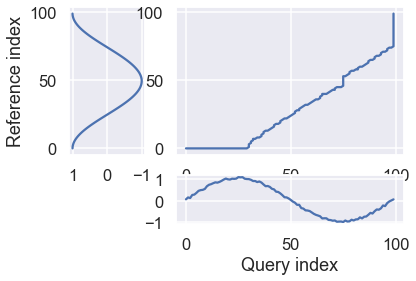

In [9]:
## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")


<AxesSubplot:xlabel='Index', ylabel='Query value'>

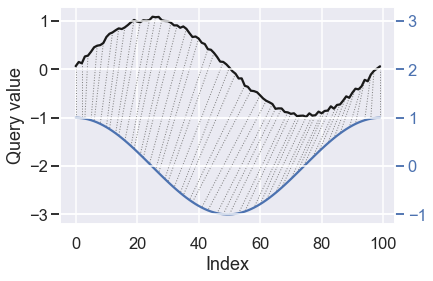

In [10]:
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## SG/TW Comparison

Text(0, 0.5, 'Death')

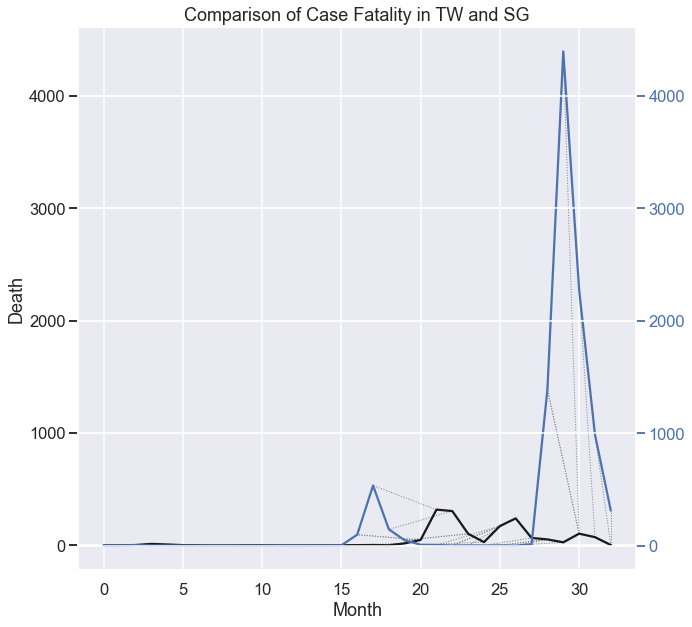

In [11]:
plt.rcParams["figure.figsize"] = (10,10)

plot = dtw(deceased_month['SG'].values,deceased_month['TW'].values, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

plot.set_title("Comparison of Case Fatality in TW and SG")
plot.set_xlabel("Month")
plot.set_ylabel("Death")


In [ ]:
plt.rcParams["figure.figsize"] = (10,10)

plot = dtw(deceased_month['SG'].values,deceased_month['JP'].values, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

plot.set_title("Comparison of Case Fatality in JP and SG")
plot.set_xlabel("Month")
plot.set_ylabel("Death")


## Heatmap of DTW values

In [ ]:
# import sys
# !{sys.executable} -m pip install fastdtw

In [ ]:
from fastdtw import fastdtw

In [ ]:
deceased_month_noNAs.head(5)

In [ ]:
countries_noNAs = deceased_month_noNAs.columns[1:].array
countries_noNAs

In [ ]:
# Use this code to get pairwise dtw cost
print("The difference between SG and TW is",fastdtw(df['SG'].values,df['TW'].values)[0],".")
print("The difference between SG and JP is",fastdtw(df['SG'].values,df['JP'].values)[0],".")
print("The difference between SG and US is",fastdtw(df['SG'].values,df['US'].values)[0],".")

In [ ]:
# Create pandas dataframe for pairwise comparisons between the countries
df_dtw_pairwise = pd.DataFrame(index = df.columns, columns = df.columns)
df_dtw_pairwise = df_dtw_pairwise.drop("month_year")
df_dtw_pairwise = df_dtw_pairwise.drop("month_year", axis = 1)

df_dtw_pairwise.head()

In [ ]:
# Uncomment if you want to rerun this for-loop

# for row_index, i in enumerate(countries_noNAs):
#     for column_index, j in enumerate(countries_noNAs):
#         df_dtw_pairwise.iloc[row_index, column_index] = fastdtw(df[i].values, df[j].values)[0]

In [ ]:
df_dtw_pairwise.head(30)

In [ ]:
# df_dtw_pairwise.to_csv(r"generated_data\dtw_pairwise.csv")

In [ ]:
df_dtw_pairwise = pd.read_csv(r"generated_data\dtw_pairwise.csv")
df_dtw_pairwise = df_dtw_pairwise.set_index("Unnamed: 0")

df_dtw_pairwise.head(20)

In [ ]:
df_dtw_pairwise.iloc[:21,:21]

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.heatmap(df_dtw_pairwise, cmap = 'coolwarm')
# p.sns.color_palette("coolwarm", as_cmap=True)
p.set( xlabel = "Countries", ylabel = "Countries")


# Time-series Clustering

## Convert DF to Array dtype

At this point in the notebook, we use the `tslearn` package to cluster similar time series based on death.
We need to convert the dataframe to an array for the `tslearn` package to run the clustering algorithm.

In [3]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline
sns.set()
sns.set_context("talk")

import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff



## Load dataframes

In [4]:
# Load index df
index = pd.read_csv (r'datasets\index.csv')
# Load df of time series
deceased_month_noNAs = pd.read_csv(r"generated_data\deceased_month_noNAs.csv").iloc[:,1:]
# Load matrix of pairwise dtw distance values
df_dtw_pairwise = pd.read_csv(r"generated_data\dtw_pairwise.csv")

In [5]:
index_country_level = index[['location_key','country_code','country_name']]
country_codes = index_country_level.groupby(['country_code','country_name']).agg('count').reset_index().iloc[:,:2]

In [6]:
# Turn `deceased_month_noNAs` into a numpy array
X = deceased_month_noNAs.iloc[:,1:].transpose().to_numpy()

In [7]:
# Load tslearn (timeseries learn package)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from tslearn.generators import random_walks

## Inertia Comparison

Initiate a for loop to get inertia values of n-clusters for n between 1 and 100.

In [8]:
################################################
# This loop took my X260 around 30 mins to run.#
################################################
# for i in range(101):
#     if i ==0:
#         pass
#     else:
#         km = TimeSeriesKMeans(n_clusters= i , metric="dtw",
#                        random_state=0, dtw_inertia = True)
#         inertia.append(km.fit(X).inertia_)

#################################################
#Create the inertia dataframe for visualisation.#
#################################################

# inertia_df = pd.DataFrame({
#     'inertia' : inertia,
#     'inertia_log': np.log(inertia)
# }).reset_index()

# inertia_df['index'] = inertia_df['index'] + 1
# inertia_df = inertia_df.rename(columns = {'index':'n_clusters'})
# inertia_df['n_clusters'] = inertia_df['n_clusters'].astype(int)
# inertia_df.to_csv(r"generated_data\inertia_df.csv")

In [9]:
# Read inertia_df
inertia_df = pd.read_csv (r'generated_data\inertia_df.csv').iloc[:,1:]

Text(0.5, 1.0, 'Elbow Plot fo 0-100 clusters')

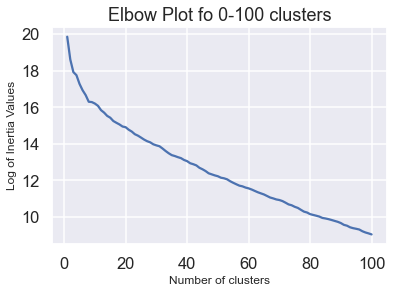

In [10]:
p = sns.lineplot(
    data=inertia_df,
    x="n_clusters", y="inertia_log",
    markers=True, dashes=False
)

p.set_xlabel("Number of clusters", fontsize = 12)
p.set_ylabel("Log of Inertia Values", fontsize = 12)
p.set_title("Elbow Plot fo 0-100 clusters")

Text(0.5, 1.0, 'Inertia Value per Number of Clusters')

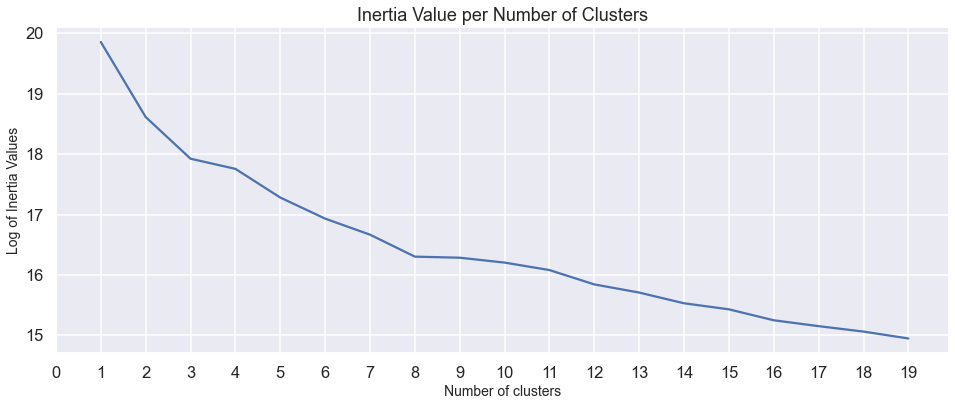

In [68]:
plt.figure(figsize=(16, 6))
p = sns.lineplot(
    data=inertia_df[(inertia_df["n_clusters"] < 20)],
    x="n_clusters", y="inertia_log",
    markers= True, dashes=False,ms=50
)

p.set_xlabel("Number of clusters", fontsize = 14)
p.set_ylabel("Log of Inertia Values", fontsize = 14)
_ = plt.xticks(np.arange(0, 20, step=1))
p.set_title("Inertia Value per Number of Clusters")

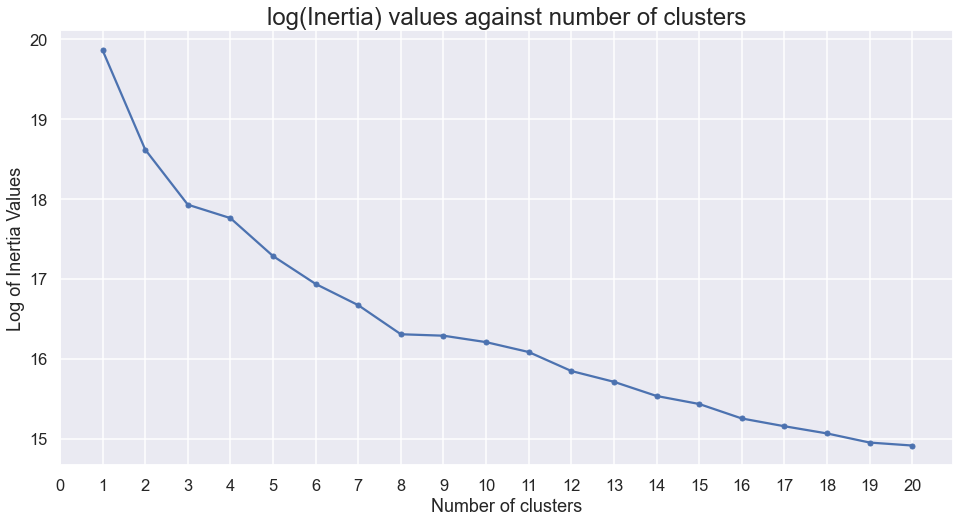

In [12]:
plt.figure(figsize=(16, 8))
plt.plot('n_clusters',"inertia_log", scalex=True, scaley=True, data=inertia_df[(inertia_df["n_clusters"] < 21)],
         marker="o", markersize =5)
plt.xlabel("Number of clusters")
plt.ylabel("Log of Inertia Values")
plt.title("log(Inertia) values against number of clusters", fontsize = 24)
_ = plt.xticks(np.arange(0, 21, step=1))

In [13]:
inertia_df[(inertia_df["n_clusters"] < 41) & (inertia_df["n_clusters"] > 19)]

n_clusters       inertia  inertia_log
19          20  2.995020e+06    14.912461
20          21  2.611851e+06    14.775570
21          22  2.359935e+06    14.674145
22          23  2.042644e+06    14.529756
23          24  1.888913e+06    14.451512
24          25  1.700290e+06    14.346309
25          26  1.524031e+06    14.236869
26          27  1.394022e+06    14.147704
27          28  1.310103e+06    14.085616
28          29  1.177474e+06    13.978882
29          30  1.109755e+06    13.919650
30          31  1.058467e+06    13.872332
31          32  9.358220e+05    13.749181
32          33  8.163812e+05    13.612637
33          34  7.216330e+05    13.489272
34          35  6.511412e+05    13.386482
35          36  6.194843e+05    13.336643
36          37  5.822296e+05    13.274620
37          38  5.524319e+05    13.222085
38          39  4.994934e+05    13.121350
39          40  4.682370e+05    13.056730

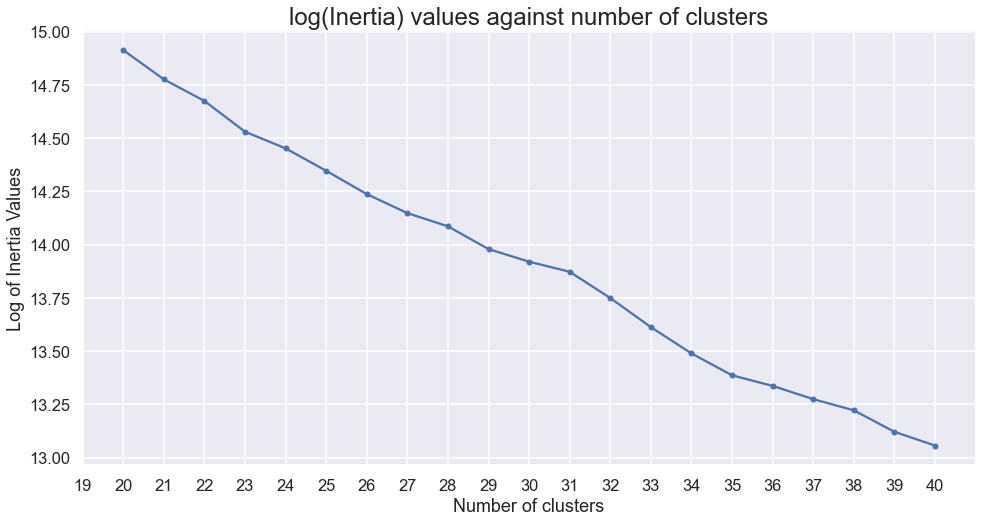

In [14]:
plt.figure(figsize=(16, 8))
plt.plot('n_clusters',"inertia_log", scalex=True, scaley=True, 
         data=inertia_df[(inertia_df["n_clusters"] < 41) & (inertia_df["n_clusters"] > 19)],
         marker="o", markersize =5)
plt.xlabel("Number of clusters")
plt.ylabel("Log of Inertia Values")
plt.title("log(Inertia) values against number of clusters", fontsize = 24)
_ = plt.xticks(np.arange(19, 41, step=1))

## fit_predict (Choose n_clusters = 8)

In [15]:
km = TimeSeriesKMeans(n_clusters= 8 , metric="dtw",
               random_state=0, dtw_inertia = True)
y_pred = km.fit_predict(X)

In [16]:
len(y_pred)

229

In [17]:
cluster_labels = pd.DataFrame({
    'cluster' : y_pred
})

In [18]:
clustered_df = deceased_month_noNAs.iloc[:,1:].transpose()
clustered_df['cluster'] = y_pred + 1
clustered_df = clustered_df.reset_index().rename(columns = {'index':"country_code"})
clustered_df

country_code    0    1     2      3      4       5       6       7  \
0             AD  0.0  0.0  13.0   30.0    8.0     1.0     0.0     1.0   
1             AE  0.0  0.0   8.0  103.0  155.0    50.0    35.0    33.0   
2             AF  0.0  0.0   4.0   68.0  202.0   537.0   476.0   126.0   
3             AG  0.0  0.0   0.0    3.0    0.0     0.0     0.0     0.0   
4             AI  0.0  0.0   0.0    0.0    0.0     0.0     0.0     0.0   
..           ...  ...  ...   ...    ...    ...     ...     ...     ...   
224           YE  0.0  0.0   0.0    2.0   82.0   234.0   177.0    76.0   
225           YT  0.0  0.0   2.0    2.0   20.0    11.0     4.0     1.0   
226           ZA  1.0  0.0   4.0  111.0  704.0  4415.0  5404.0  6110.0   
227           ZM  3.0  0.0   0.0    2.0    4.0    23.0   134.0   125.0   
228           ZW  5.0  0.0   1.0    2.0    0.0     3.0    62.0   132.0   

          8  ...      24      25     26     27     28     29     30     31  \
0       0.0  ...     5.0     6.0    2.0    0.0    0.0    0.0    0.0    1.0   
1      37.0  ...    83.0    53.0    1.0    0.0    3.0   12.0   18.0    6.0   
2      49.0  ...    61.0   192.0   62.0   12.0   24.0   16.0   28.0   27.0   
3       0.0  ...     8.0     8.0    0.0    2.0    1.0    3.0    3.0    1.0   
4       0.0  ...     3.0     1.0    0.0    0.0    0.0    0.0    1.0    1.0   
..      ...  ...     ...     ...    ...    ...    ...    ...    ...    ...   
224    17.0  ...    29.0   122.0    8.0    6.0    0.0    0.0    2.0    4.0   
225     2.0  ...     2.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
226  2603.0  ...  4090.0  4142.0  612.0  321.0  856.0  592.0  171.0  126.0   
227    43.0  ...   180.0    32.0   14.0   10.0   11.0   16.0   12.0    1.0   
228    24.0  ...   333.0    45.0   49.0   25.0   38.0   51.0   20.0   18.0   

      32  cluster  
0    0.0        2  
1    0.0        2  
2    5.0        2  
3    0.0        2  
4    0.0        2  
..   ...      ...  
224  0.0        2  
225  0.0        2  
226  0.0        4  
227  0.0        2  
228  0.0        2  

[229 rows x 35 columns]

In [19]:
# Save clustered_df to file folder
# clustered_df.to_csv(r"generated_data\clustered_countries.csv")

## Distribution of clusters

In [20]:
# Number of countries per cluster
cluster_count = clustered_df.groupby('cluster').agg('count').iloc[:,:1].reset_index().rename(columns = {0:'count'})
cluster_count = cluster_count.rename(columns = {"country_code": 'count'})

## List of countries per cluster

In [21]:
index_country_level = index[['location_key','country_code','country_name']]

In [22]:
cluster_1 = pd.merge(clustered_df[(clustered_df["cluster"] == 1)],country_codes, how = "inner")

In [23]:
cluster_1 = pd.merge(clustered_df[(clustered_df["cluster"] == 1)],country_codes, how = "inner")
cluster_2 = pd.merge(clustered_df[(clustered_df["cluster"] == 2)],country_codes, how = "inner")
cluster_3 = pd.merge(clustered_df[(clustered_df["cluster"] == 3)],country_codes, how = "inner")
cluster_4 = pd.merge(clustered_df[(clustered_df["cluster"] == 4)],country_codes, how = "inner")
cluster_5 = pd.merge(clustered_df[(clustered_df["cluster"] == 5)],country_codes, how = "inner")
cluster_6 = pd.merge(clustered_df[(clustered_df["cluster"] == 6)],country_codes, how = "inner")
cluster_7 = pd.merge(clustered_df[(clustered_df["cluster"] == 7)],country_codes, how = "inner")
cluster_8 = pd.merge(clustered_df[(clustered_df["cluster"] == 8)],country_codes, how = "inner")

In [24]:
# for i in range(8):
# #     cluster.to_csv(r"generated_data\clustered_countries.csv")

# # Try using f-string
# # Context manager


In [25]:
cluster_count.sort_values(['count'])

cluster  count
2        3      1
4        5      1
5        6      1
0        1      2
7        8      2
3        4     11
6        7     33
1        2    178

We see that cluster 3,5,6 are single outliers, have 1 country in each cluster.
We see that cluster 1,8 are also outliers, have 2 countries in each cluster. 

In [26]:
cluster_3['country_name']

0    Brazil
Name: country_name, dtype: object


<font size="6">Single Country Outliers </font>

In [27]:
print("Cluster 3:", *cluster_3['country_name'])
print("Cluster 5:", *cluster_5['country_name'])
print("Cluster 6:", *cluster_6['country_name'])

Cluster 3: Brazil
Cluster 5: United States of America
Cluster 6: India


<font size="6">Dual Country Outliers </font>

In [28]:
print("Cluster 1:", *cluster_1['country_name'], sep = "\n")
print("\n")
print("Cluster 8:", *cluster_8['country_name'], sep = "\n")

Cluster 1:
Mexico
Russia


Cluster 8:
United Kingdom
Indonesia


<font size="6"> Cluster 4: 11 Countries </font>

In [29]:
print("Cluster 4:", *cluster_4['country_name'], sep = "\n")

Cluster 4:
Argentina
Colombia
Germany
Spain
France
Iran
Italy
Peru
Poland
Ukraine
South Africa


<font size="6"> Cluster 7: 33 Countries </font>

In [30]:
print("Cluster 7:", *cluster_7['country_name'], sep = "\n")

Cluster 7:
Austria
Bangladesh
Belgium
Bulgaria
Bolivia
Canada
Chile
China
Czech Republic
Ecuador
Greece
Hungary
Iraq
Japan
South Korea
Kazakhstan
Sri Lanka
Myanmar
Malaysia
Netherlands
Nepal
Philippines
Pakistan
Portugal
Paraguay
Romania
Sweden
Slovakia
Thailand
Tunisia
Turkey
Taiwan
Vietnam


<font size="6"> Cluster 2: 178 Countries </font>

In [31]:
print("Cluster 2:", *cluster_2['country_name'], sep = "\n")

Cluster 2:
Andorra
United Arab Emirates
Afghanistan
Antigua and Barbuda
Anguilla
Albania
Armenia
Angola
American Samoa
Australia
Aruba
Azerbaijan
Bosnia and Herzegovina
Barbados
Burkina Faso
Bahrain
Burundi
Benin
Bermuda
Brunei
Bahamas
Bhutan
Botswana
Belarus
Belize
Democratic Republic of the Congo
Central African Republic
Republic of the Congo
Switzerland
Ivory Coast
Cook Islands
Cameroon
Costa Rica
Cuba
Cape Verde
Curaçao
Cyprus
Djibouti
Denmark
Dominica
Dominican Republic
Algeria
Estonia
Egypt
Eritrea
Ethiopia
Finland
Fiji
Falkland Islands
Micronesia
Faroe Islands
Gabon
Grenada
Georgia
French Guiana
Guernsey
Ghana
Gibraltar
Greenland
Gambia
Guinea
Equatorial Guinea
Guatemala
Guam
Guinea-Bissau
Guyana
Honduras
Croatia
Haiti
Ireland
Israel
Isle of Man
Iceland
Jersey
Jamaica
Jordan
Kenya
Kyrgyzstan
Cambodia
Kiribati
Comoros
Saint Kitts and Nevis
North Korea
Kuwait
Cayman Islands
Laos
Lebanon
Saint Lucia
Liechtenstein
Liberia
Lesotho
Lithuania
Luxembourg
Latvia
Libya
Morocco
Monaco
Mold

In [69]:
cluster_2['country_name']

(0                   Andorra
 1      United Arab Emirates
 2               Afghanistan
 3       Antigua and Barbuda
 4                  Anguilla
                ...         
 173                  Kosovo
 174                   Yemen
 175                 Mayotte
 176                  Zambia
 177                Zimbabwe
 Name: country_name, Length: 178, dtype: object,)

# Analysis

## Multiplot

Text(0.5, 1.0, 'Cluster 8')

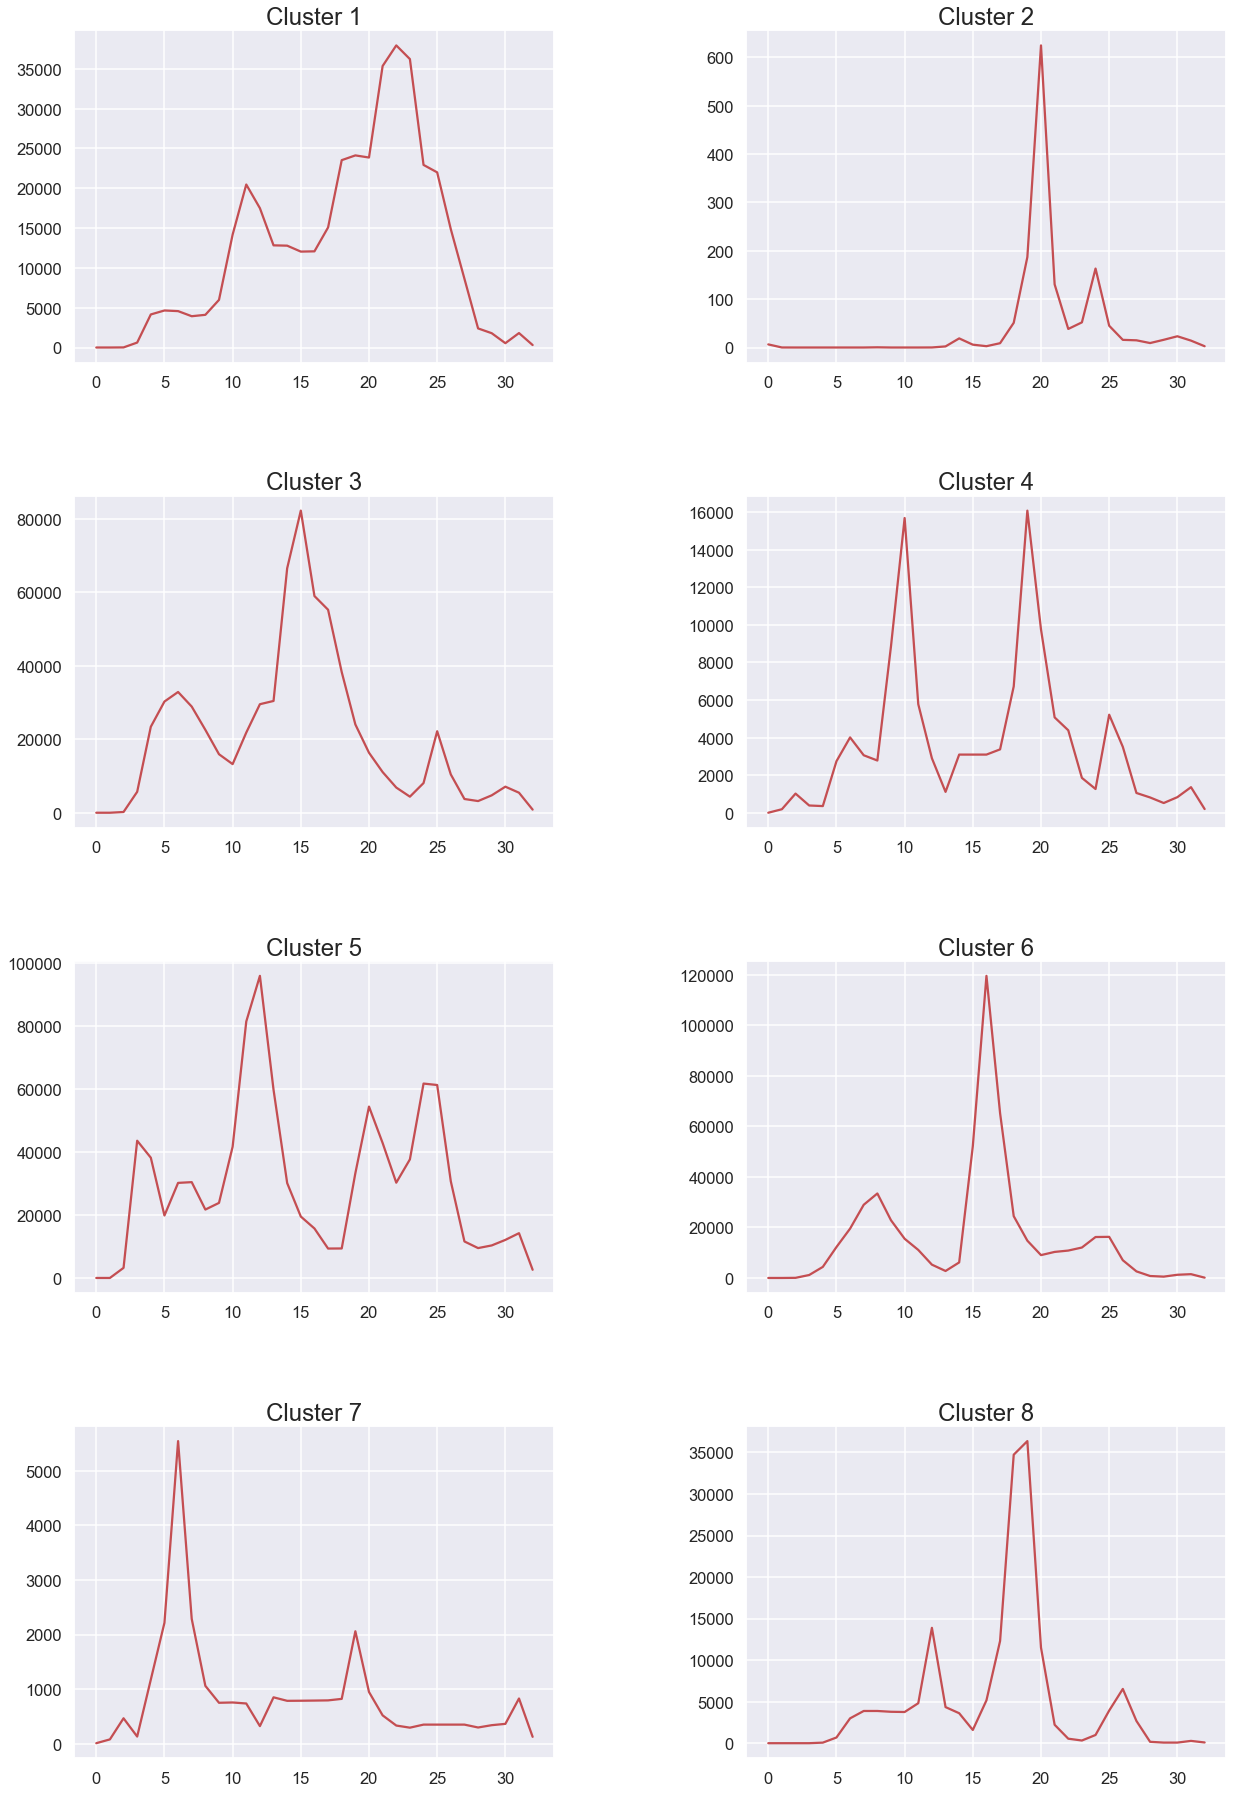

In [32]:
fig, axes = plt.subplots(4, 2, figsize=(40,30))

axes[0,0].plot(km.cluster_centers_[0].ravel(), "r-")
axes[0,1].plot(km.cluster_centers_[1].ravel(), "r-")
axes[1,0].plot(km.cluster_centers_[2].ravel(), "r-")
axes[1,1].plot(km.cluster_centers_[3].ravel(), "r-")
axes[2,0].plot(km.cluster_centers_[4].ravel(), "r-")
axes[2,1].plot(km.cluster_centers_[5].ravel(), "r-")
axes[3,0].plot(km.cluster_centers_[6].ravel(), "r-")
axes[3,1].plot(km.cluster_centers_[7].ravel(), "r-")

# Plot countries
# axes[0,0].plot(clustered_df[(clustered_df["cluster"] == 1)].iloc[:,1:-1].values.tolist()[1])
# axes[0,0].plot(clustered_df[(clustered_df["cluster"] == 1)].iloc[:,1:-1].values[0])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.5,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# plt.plot(km.cluster_centers_[1].ravel(), "r-")

axes[0,0].set_title('Cluster 1', fontsize = 24)
axes[0,1].set_title('Cluster 2', fontsize = 24)
axes[1,0].set_title('Cluster 3', fontsize = 24)
axes[1,1].set_title('Cluster 4', fontsize = 24)
axes[2,0].set_title('Cluster 5', fontsize = 24)
axes[2,1].set_title('Cluster 6', fontsize = 24)
axes[3,0].set_title('Cluster 7', fontsize = 24)
axes[3,1].set_title('Cluster 8', fontsize = 24)

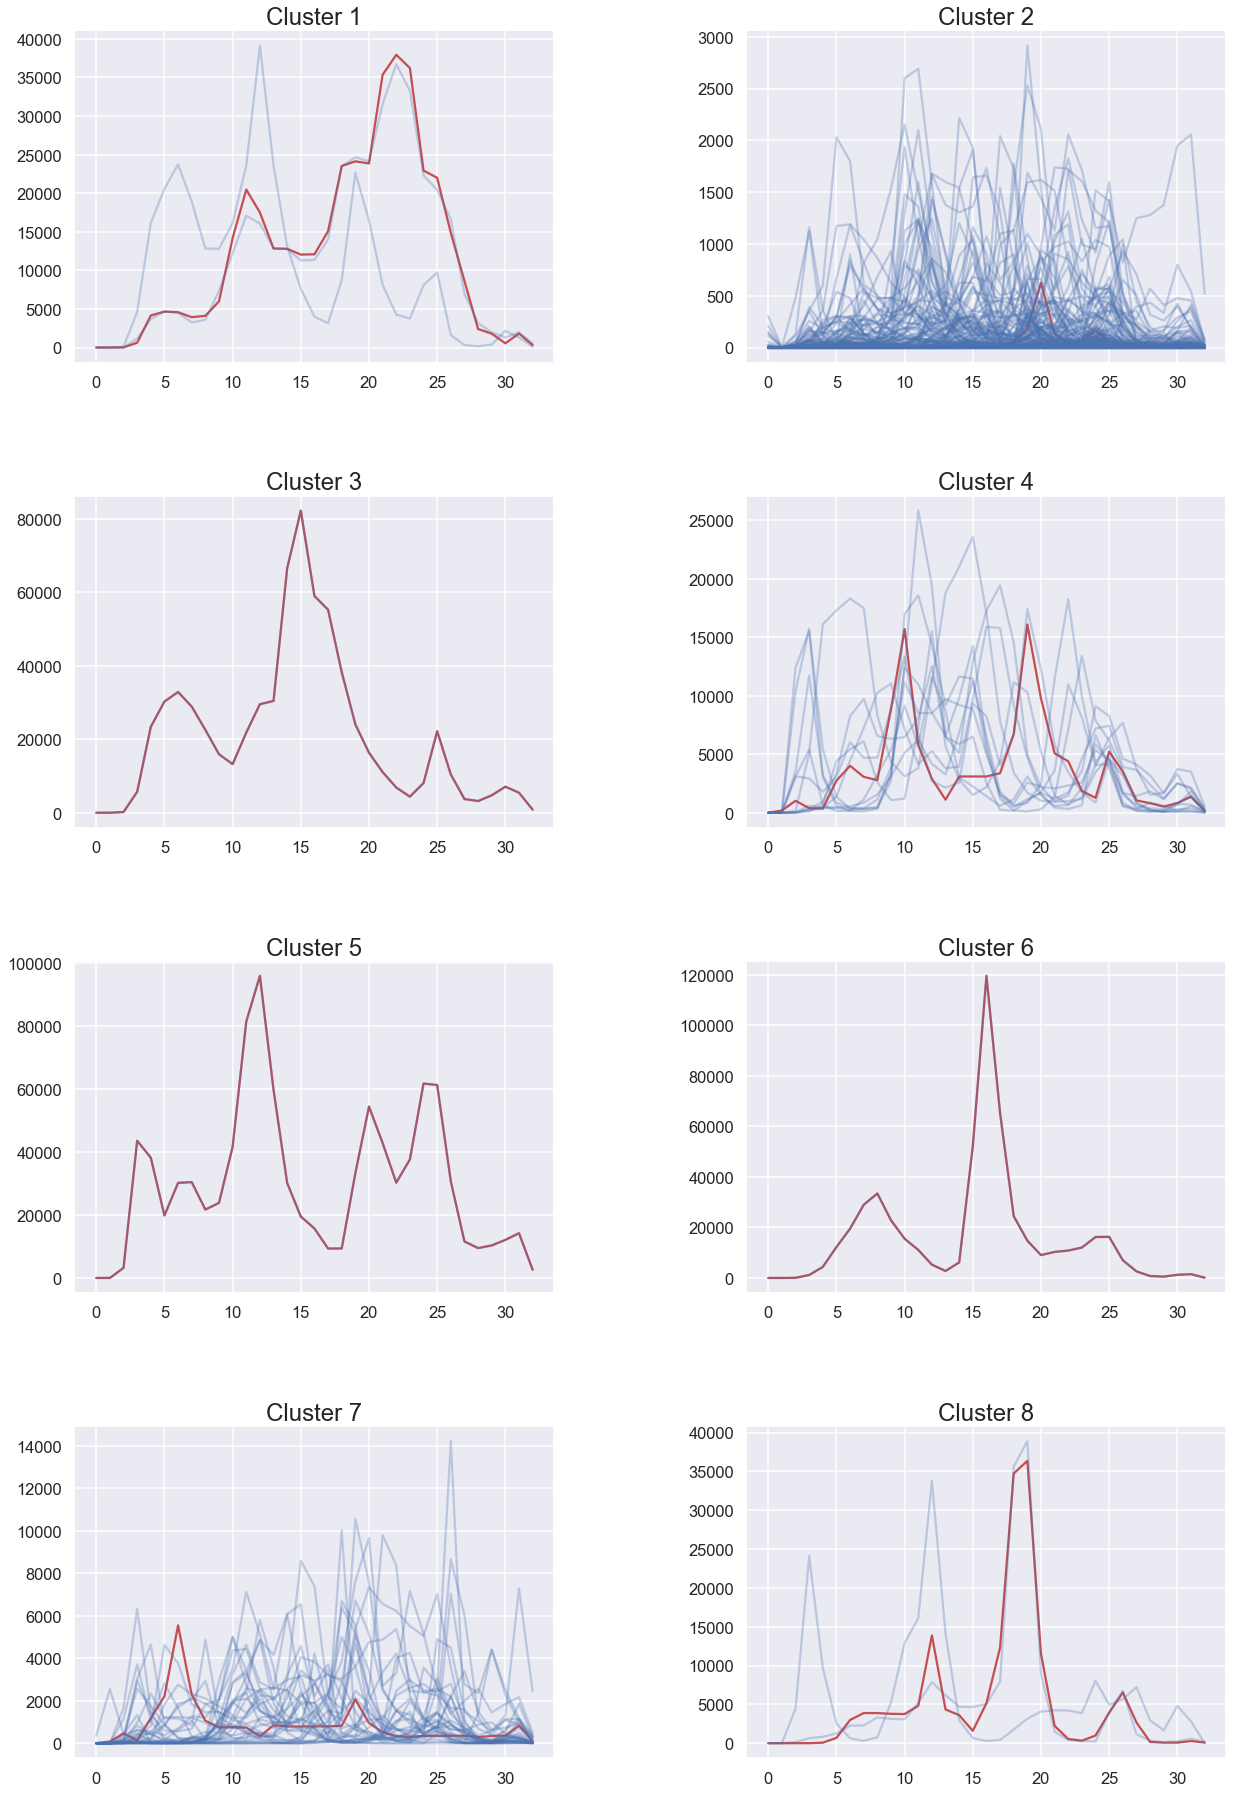

In [33]:
fig, axes = plt.subplots(4, 2, figsize=(40,30))

axes[0,0].plot(km.cluster_centers_[0].ravel(), "r-")
axes[0,1].plot(km.cluster_centers_[1].ravel(), "r-")
axes[1,0].plot(km.cluster_centers_[2].ravel(), "r-")
axes[1,1].plot(km.cluster_centers_[3].ravel(), "r-")
axes[2,0].plot(km.cluster_centers_[4].ravel(), "r-")
axes[2,1].plot(km.cluster_centers_[5].ravel(), "r-")
axes[3,0].plot(km.cluster_centers_[6].ravel(), "r-")
axes[3,1].plot(km.cluster_centers_[7].ravel(), "r-")

# Plot countries
for i in range(cluster_count['count'][0]):
    axes[0,0].plot(clustered_df[(clustered_df["cluster"] == 1)].iloc[:,1:-1].values[i],
            color = 'b', alpha = 0.3)
    
for i in range(cluster_count['count'][1]):
    axes[0,1].plot(clustered_df[(clustered_df["cluster"] == 2)].iloc[:,1:-1].values[i],
            color = 'b', alpha = 0.3)
    
for i in range(cluster_count['count'][2]):
    axes[1,0].plot(clustered_df[(clustered_df["cluster"] == 3)].iloc[:,1:-1].values[i],
            color = 'b', alpha = 0.3)
    
for i in range(cluster_count['count'][3]):
    axes[1,1].plot(clustered_df[(clustered_df["cluster"] == 4)].iloc[:,1:-1].values[i],
            color = 'b', alpha = 0.3)
    
for i in range(cluster_count['count'][4]):
    axes[2,0].plot(clustered_df[(clustered_df["cluster"] == 5)].iloc[:,1:-1].values[i],
            color = 'b', alpha = 0.3)
    
for i in range(cluster_count['count'][5]):
    axes[2,1].plot(clustered_df[(clustered_df["cluster"] == 6)].iloc[:,1:-1].values[i],
            color = 'b', alpha = 0.3)
    
for i in range(cluster_count['count'][6]):
    axes[3,0].plot(clustered_df[(clustered_df["cluster"] == 7)].iloc[:,1:-1].values[i],
            color = 'b', alpha = 0.3)
    
for i in range(cluster_count['count'][7]):
    axes[3,1].plot(clustered_df[(clustered_df["cluster"] == 8)].iloc[:,1:-1].values[i],
            color = 'b', alpha = 0.3)
    
# Adjust Margins
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.5,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# plt.plot(km.cluster_centers_[1].ravel(), "r-")

axes[0,0].set_title('Cluster 1', fontsize = 24)
axes[0,1].set_title('Cluster 2', fontsize = 24)
axes[1,0].set_title('Cluster 3', fontsize = 24)
axes[1,1].set_title('Cluster 4', fontsize = 24)
axes[2,0].set_title('Cluster 5', fontsize = 24)
axes[2,1].set_title('Cluster 6', fontsize = 24)
axes[3,0].set_title('Cluster 7', fontsize = 24)
axes[3,1].set_title('Cluster 8', fontsize = 24)

plt.show()

## Cluster 4 

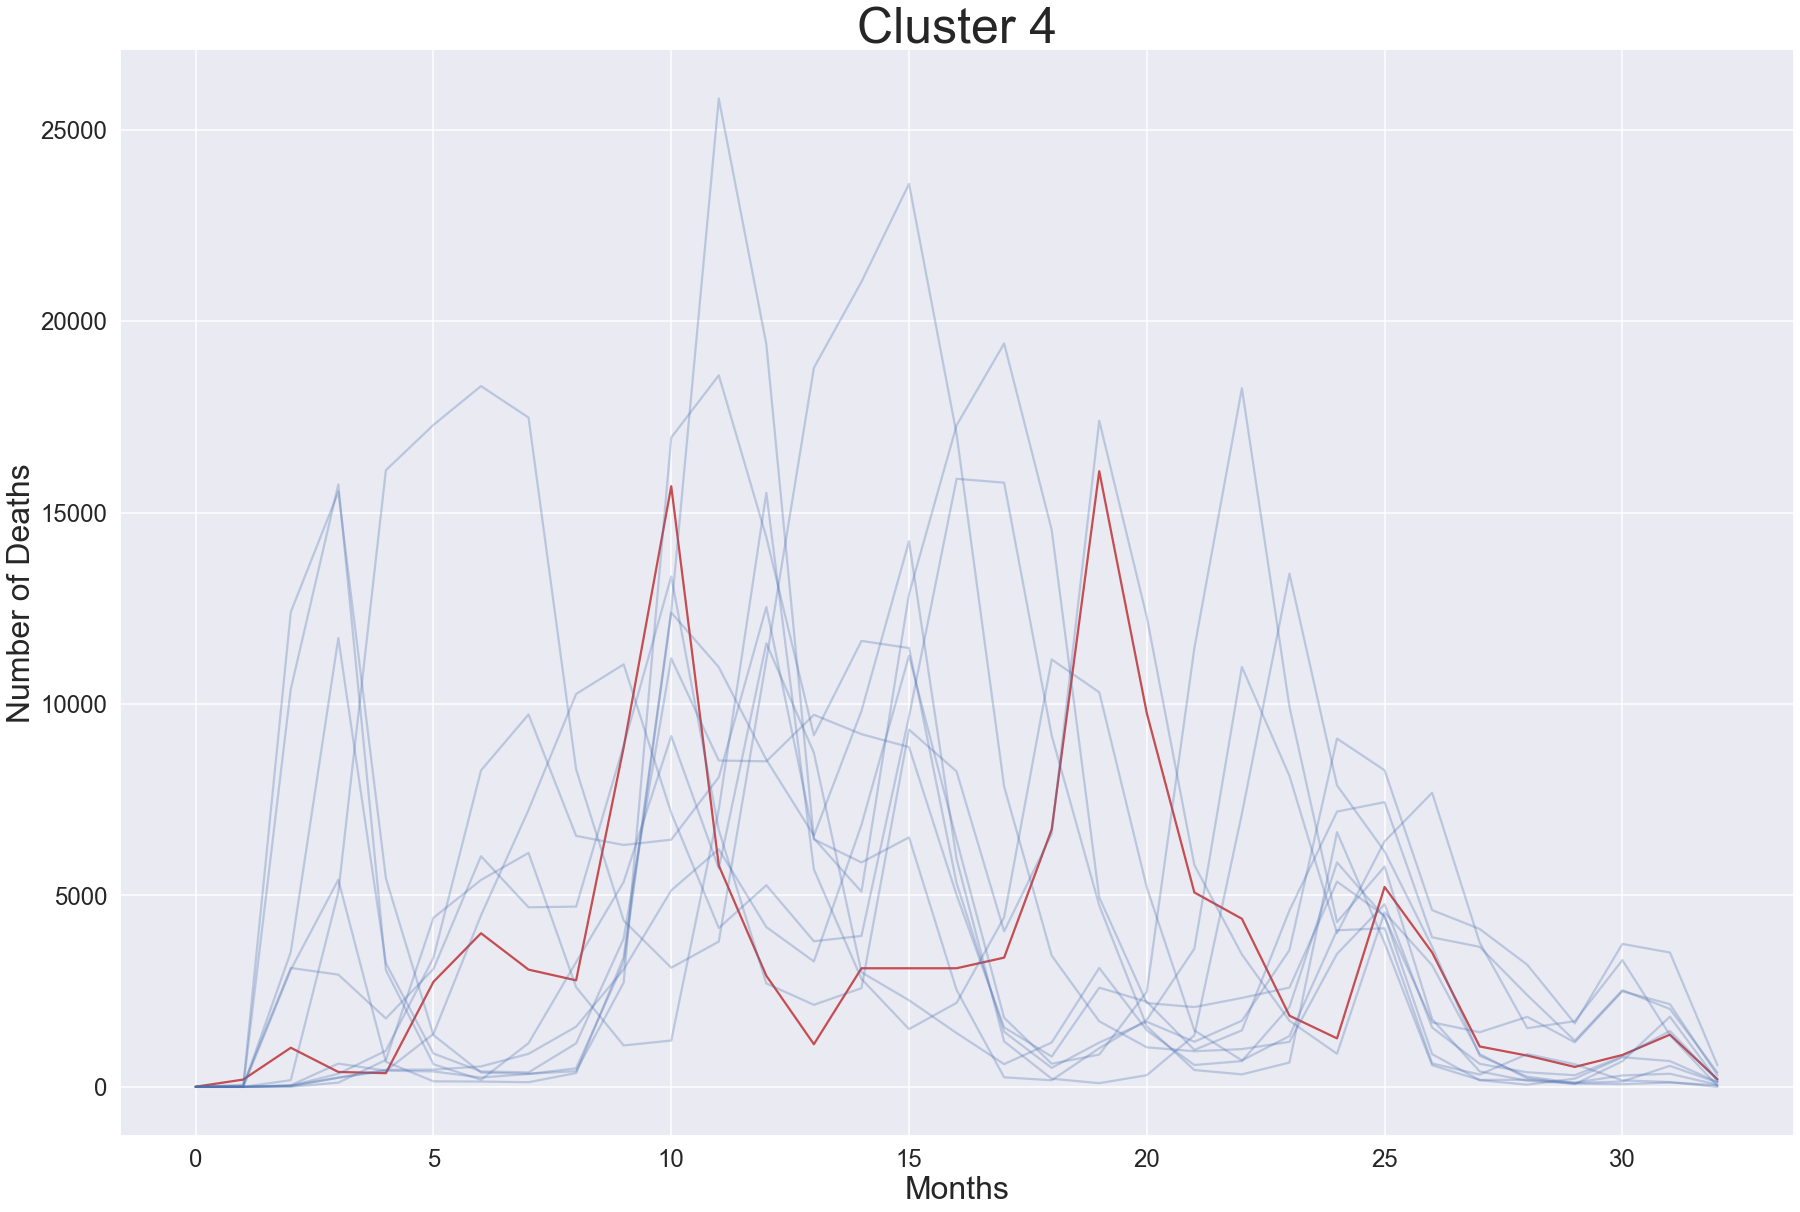

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(30,20))
plt.plot(km.cluster_centers_[3].ravel(), "r-")

for i in range(11):
    plt.plot(clustered_df[(clustered_df["cluster"] == 4)].iloc[:,1:-1].values[i],
            color = 'b', alpha = 0.3)
    
plt.title("Cluster 4", fontsize = 50)
plt.xlabel('Months', fontsize = 32)
plt.ylabel('Number of Deaths', fontsize = 32)
plt.xticks(fontsize  = 24)
plt.yticks(fontsize  = 24)

plt.show()

In [35]:
cluster_4

country_code    0     1        2        3        4        5        6  \
0            AR  0.0   1.0     29.0    238.0    417.0   1383.0   4480.0   
1            CO  0.0   0.0     34.0    342.0    944.0   3376.0   8265.0   
2            DE  0.0   1.0   3059.0   5409.0    656.0    145.0    139.0   
3            ES  0.0   1.0  10388.0  15733.0   3051.0    591.0    186.0   
4            FR  0.0   2.0   3522.0  11721.0   3231.0    871.0    404.0   
5            IR  0.0  54.0   3106.0   2931.0   1787.0   3080.0   6024.0   
6            IT  0.0  29.0  12399.0  15539.0   5448.0   1352.0    374.0   
7            PE  0.0   0.0    175.0   5084.0  16105.0  17288.0  18302.0   
8            PL  0.0   0.0     43.0    608.0    423.0    403.0    244.0   
9            UA  0.0   0.0     17.0    244.0    447.0    451.0    534.0   
10           ZA  1.0   0.0      4.0    111.0    704.0   4415.0   5404.0   

          7        8  ...      25      26      27      28      29      30  \
0    7234.0  10261.0  ...  3760.0   565.0   181.0   186.0   111.0   299.0   
1    9726.0   6555.0  ...  4467.0   854.0   176.0    57.0   216.0   775.0   
2     122.0    362.0  ...  6411.0  7682.0  3768.0  1534.0  1716.0  3310.0   
3    1142.0   3256.0  ...  4433.0  1686.0  1427.0  1829.0  1163.0  2497.0   
4     378.0   1136.0  ...  7436.0  3906.0  3657.0  2397.0  1206.0  2525.0   
5    4690.0   4708.0  ...  4560.0  3176.0   856.0   222.0    72.0   670.0   
6     342.0    411.0  ...  8269.0  4616.0  4124.0  3190.0  1656.0  3733.0   
7   17479.0   8294.0  ...  4770.0  1550.0   602.0   381.0   304.0   794.0   
8     337.0    485.0  ...  6150.0  3659.0   812.0   267.0   102.0   141.0   
9     864.0   1572.0  ...  5755.0  1768.0   404.0   158.0    87.0    71.0   
10   6110.0   2603.0  ...  4142.0   612.0   321.0   856.0   592.0   171.0   

        31     32  cluster  country_name  
0    342.0   58.0        4     Argentina  
1    674.0  127.0        4      Colombia  
2   1353.0   23.0        4       Germany  
3   2160.0  303.0        4         Spain  
4   2035.0  375.0        4        France  
5   1834.0  154.0        4          Iran  
6   3509.0  562.0        4         Italy  
7   1459.0  166.0        4          Peru  
8    549.0  114.0        4        Poland  
9    114.0   44.0        4       Ukraine  
10   126.0    0.0        4  South Africa  

[11 rows x 36 columns]

In [36]:
# This is just a function to help me plot the
# graphs of countries within cluster 4.

def cluster_4_graph(index):
    fig, axes = plt.subplots(1, 1, figsize=(30,20))
    plt.plot(km.cluster_centers_[3].ravel(), "r-")

    plt.plot(clustered_df[(clustered_df["cluster"] == 4)].iloc[:,1:-1].values[index],
                color = 'b', alpha = 0.5)

    plt.xlabel('Months', fontsize = 32)
    plt.ylabel('Number of Deaths', fontsize = 32)
    plt.xticks(fontsize  = 24)
    plt.yticks(fontsize  = 24)
    plt.title(cluster_4['country_name'][index], fontsize = 42)
    plt.show()

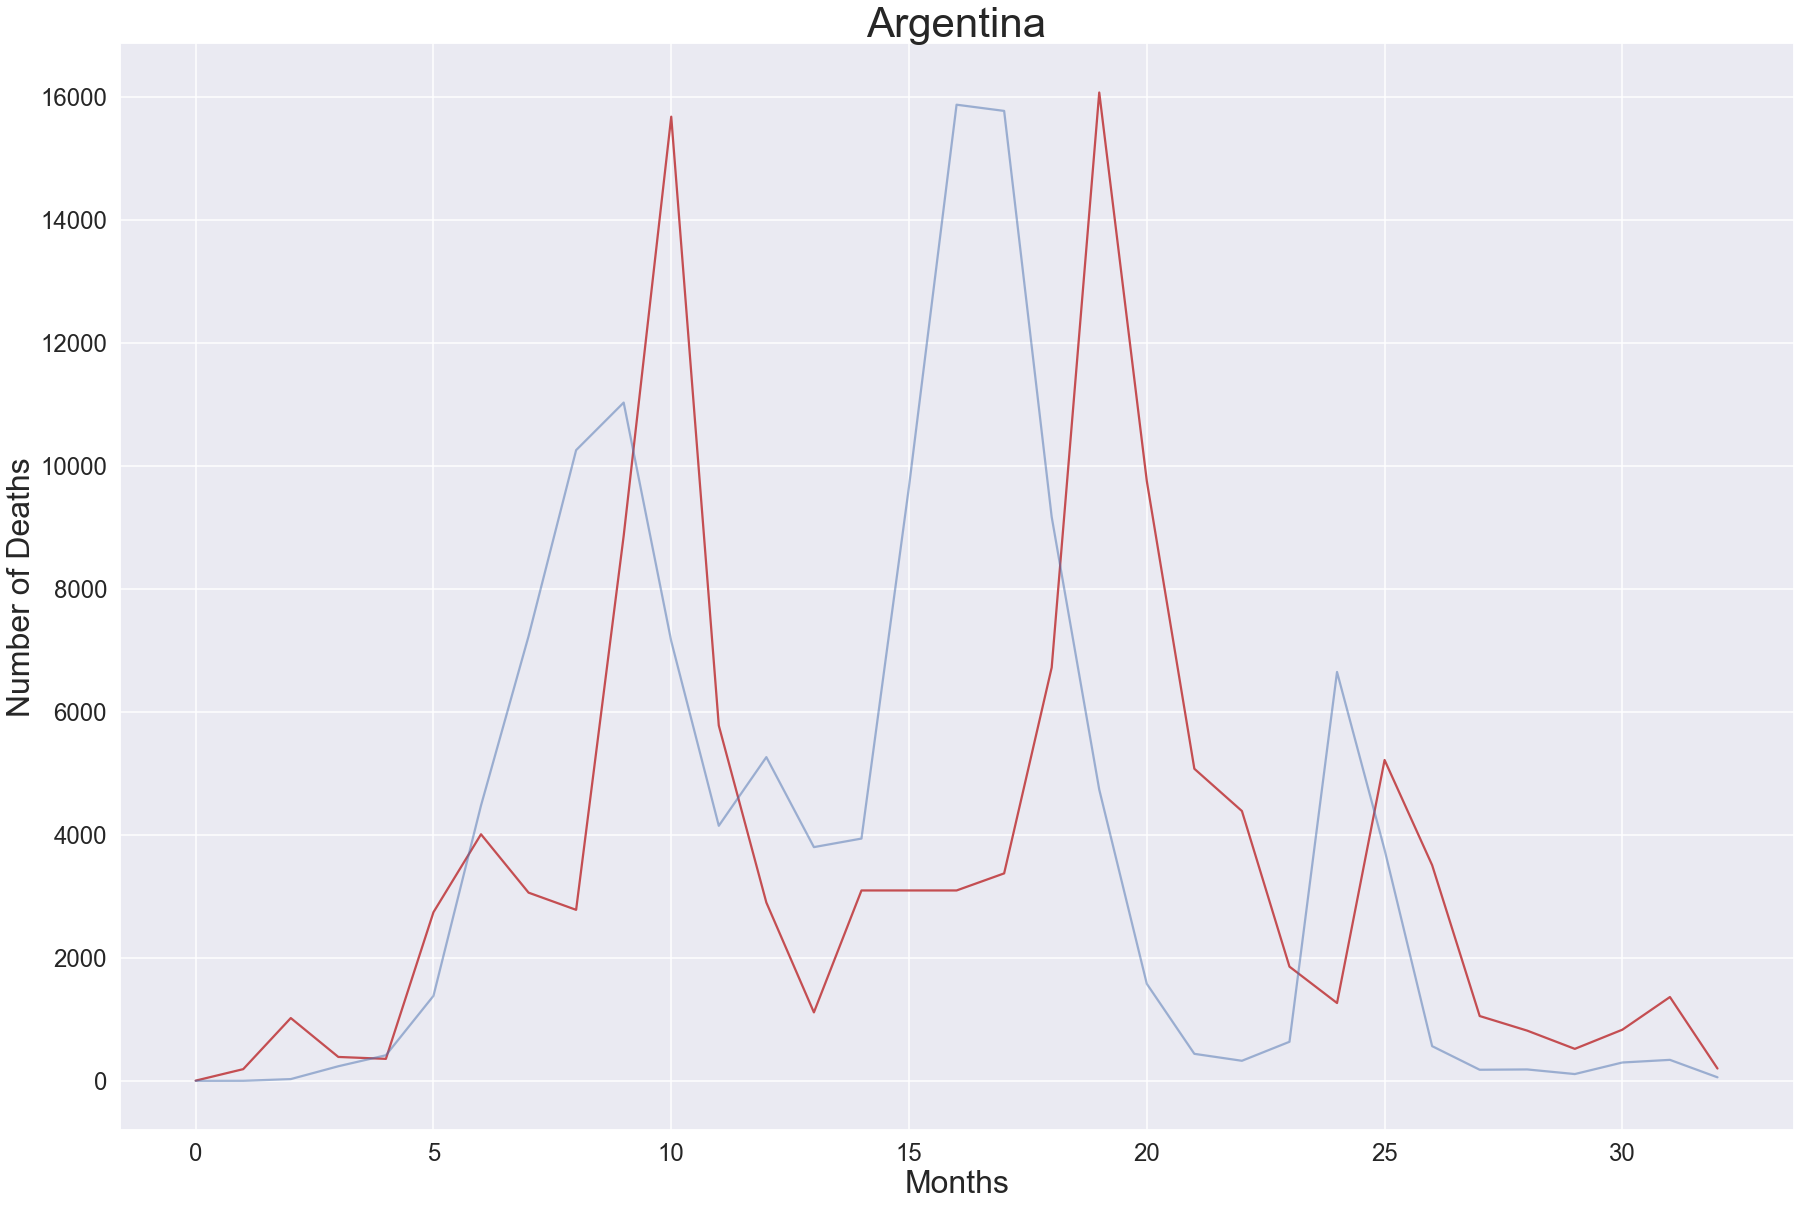

In [37]:
cluster_4_graph(0)

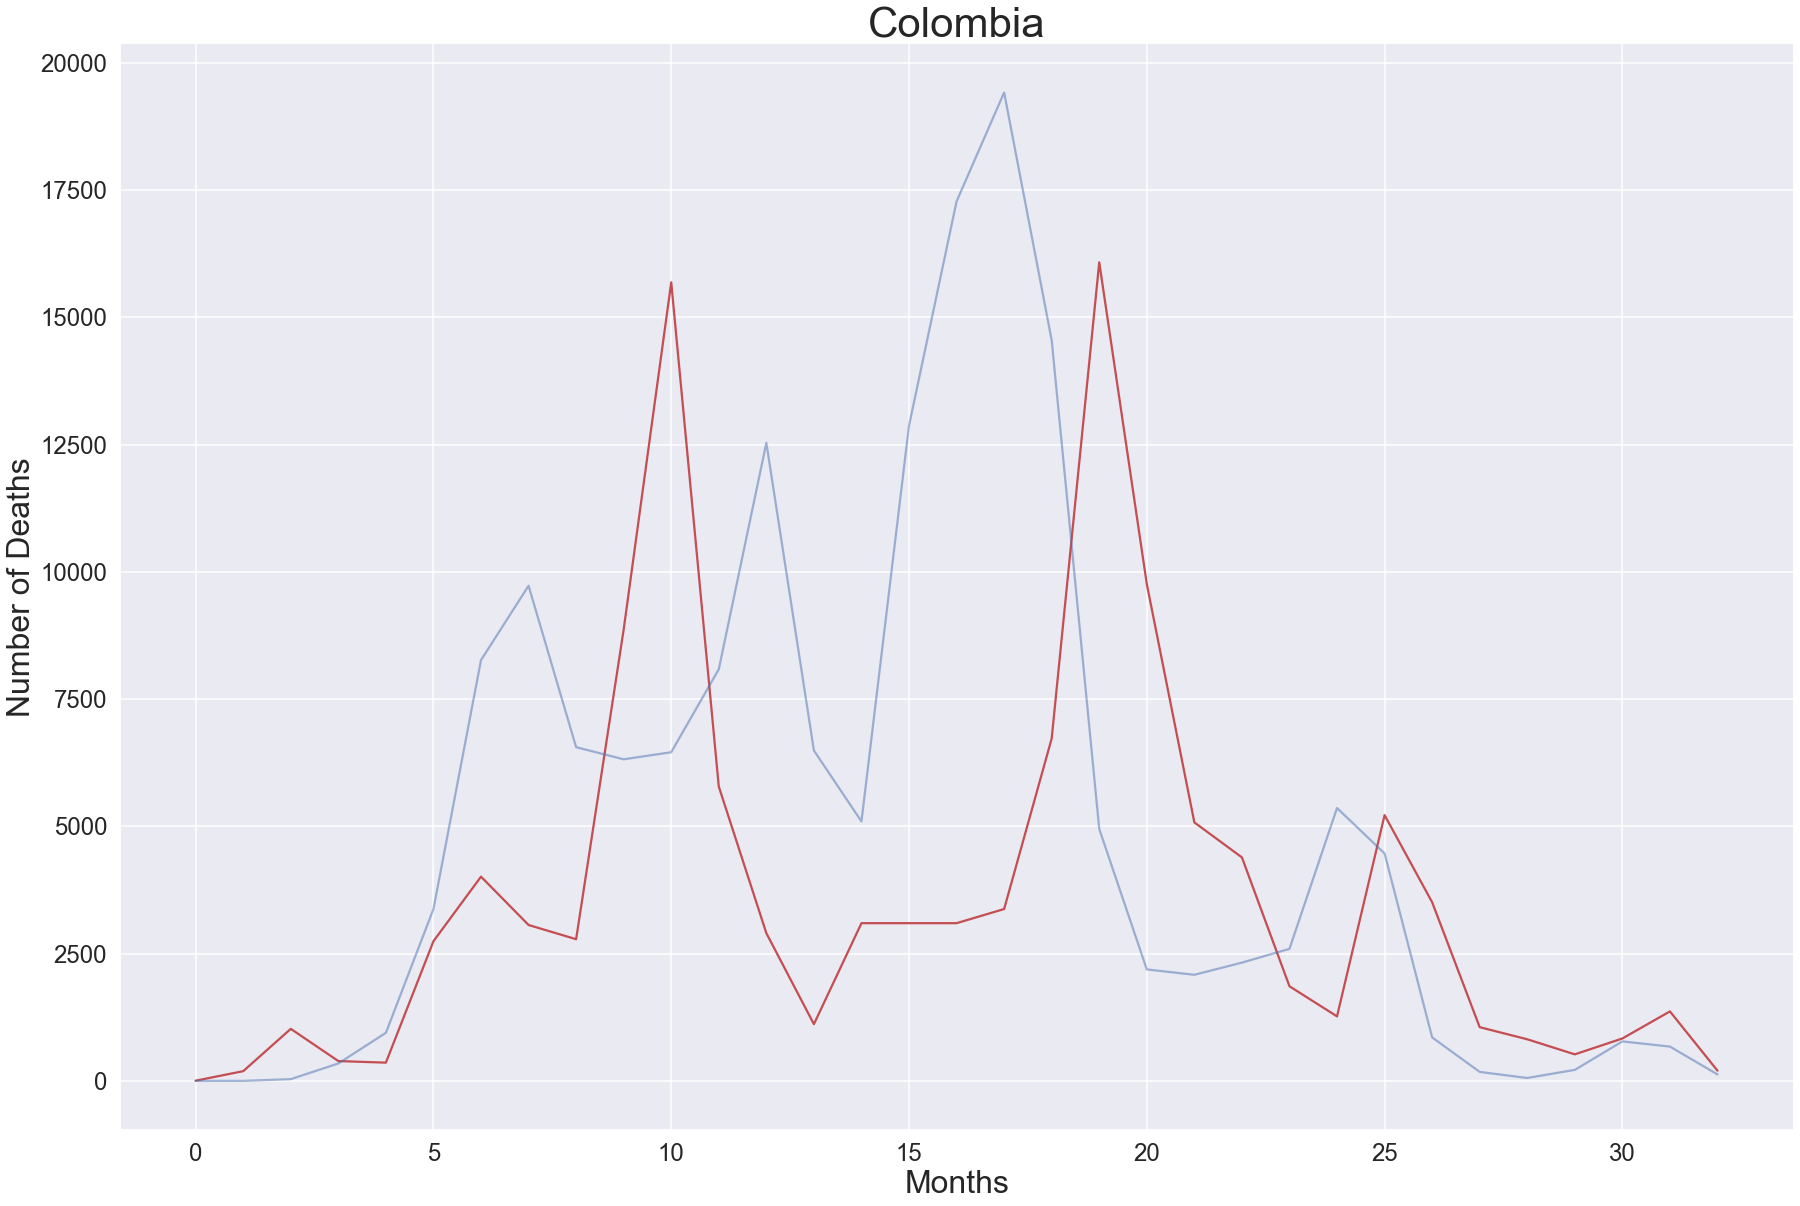

In [38]:
cluster_4_graph(1)

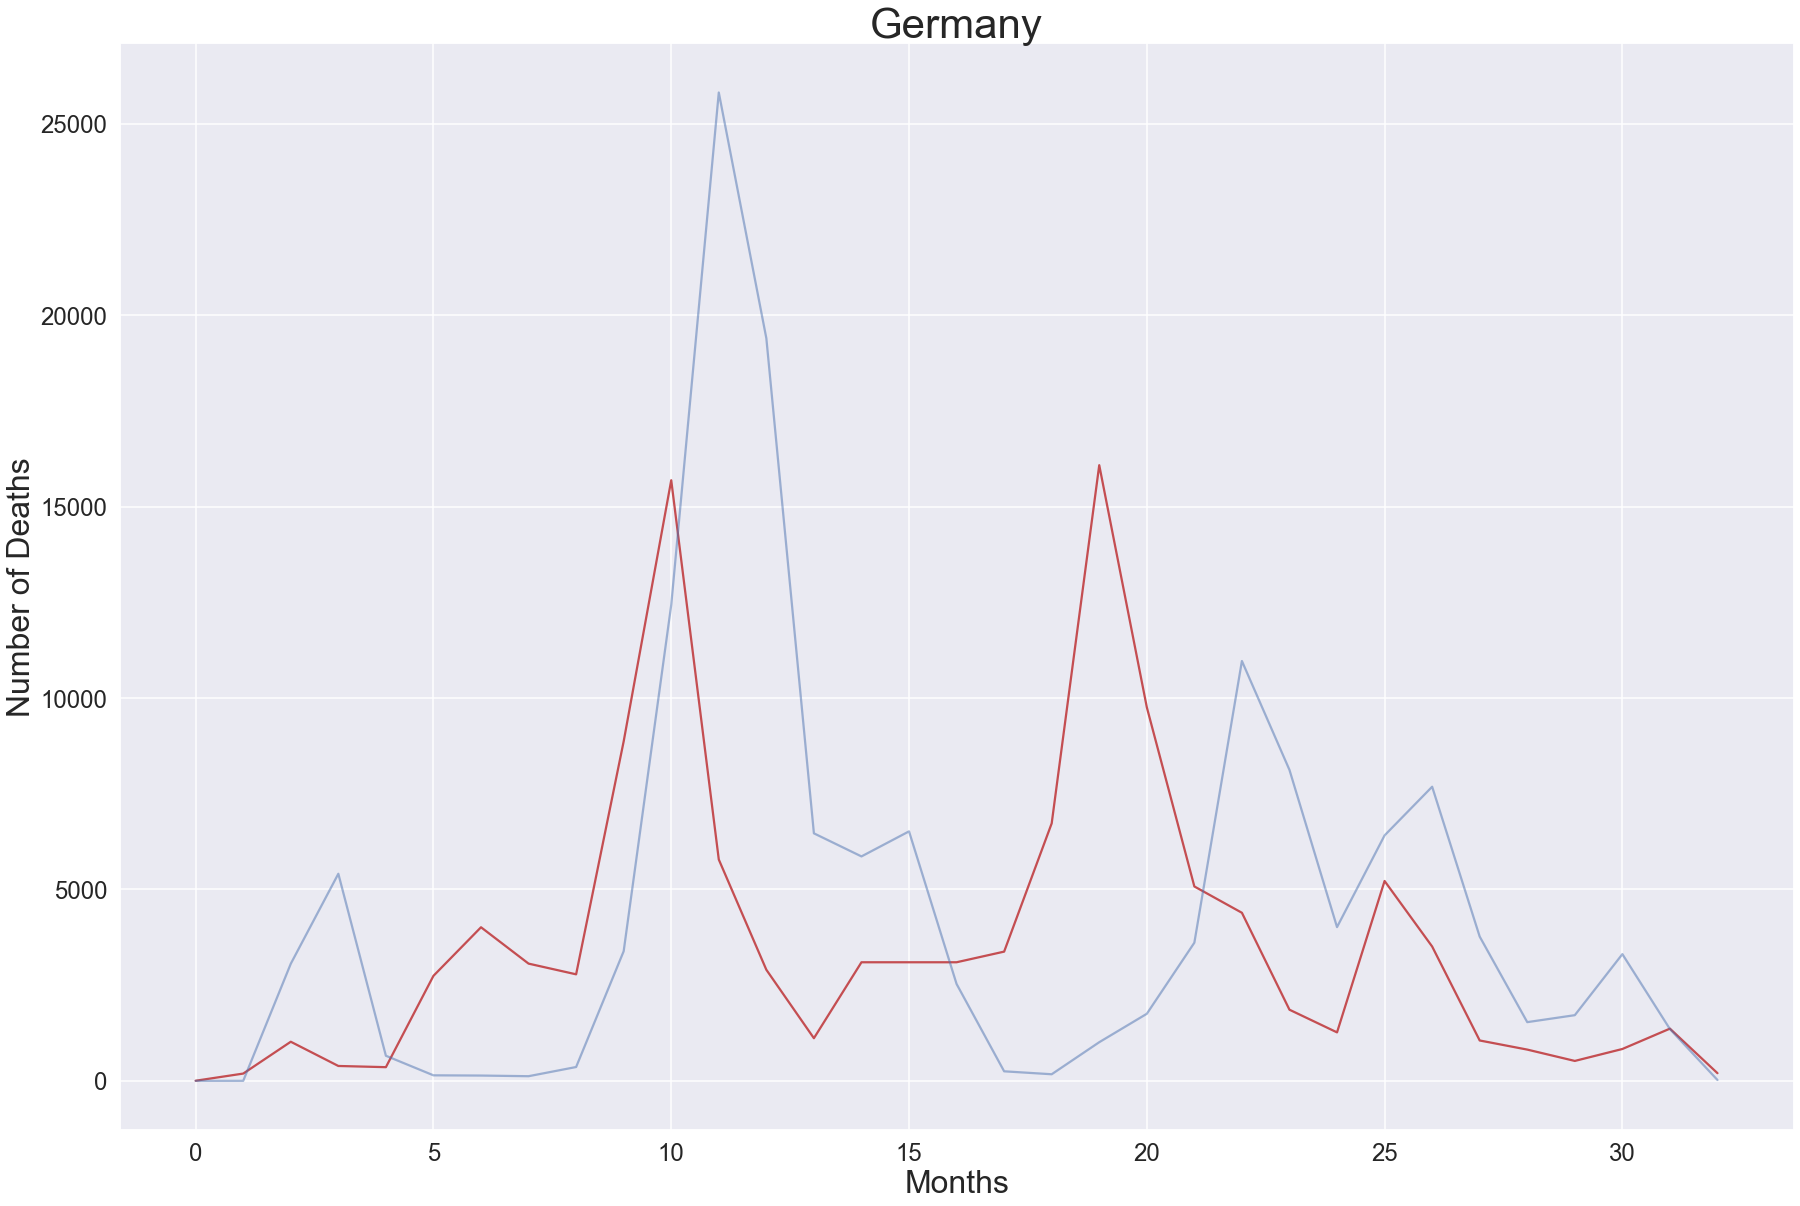

In [39]:
cluster_4_graph(2)

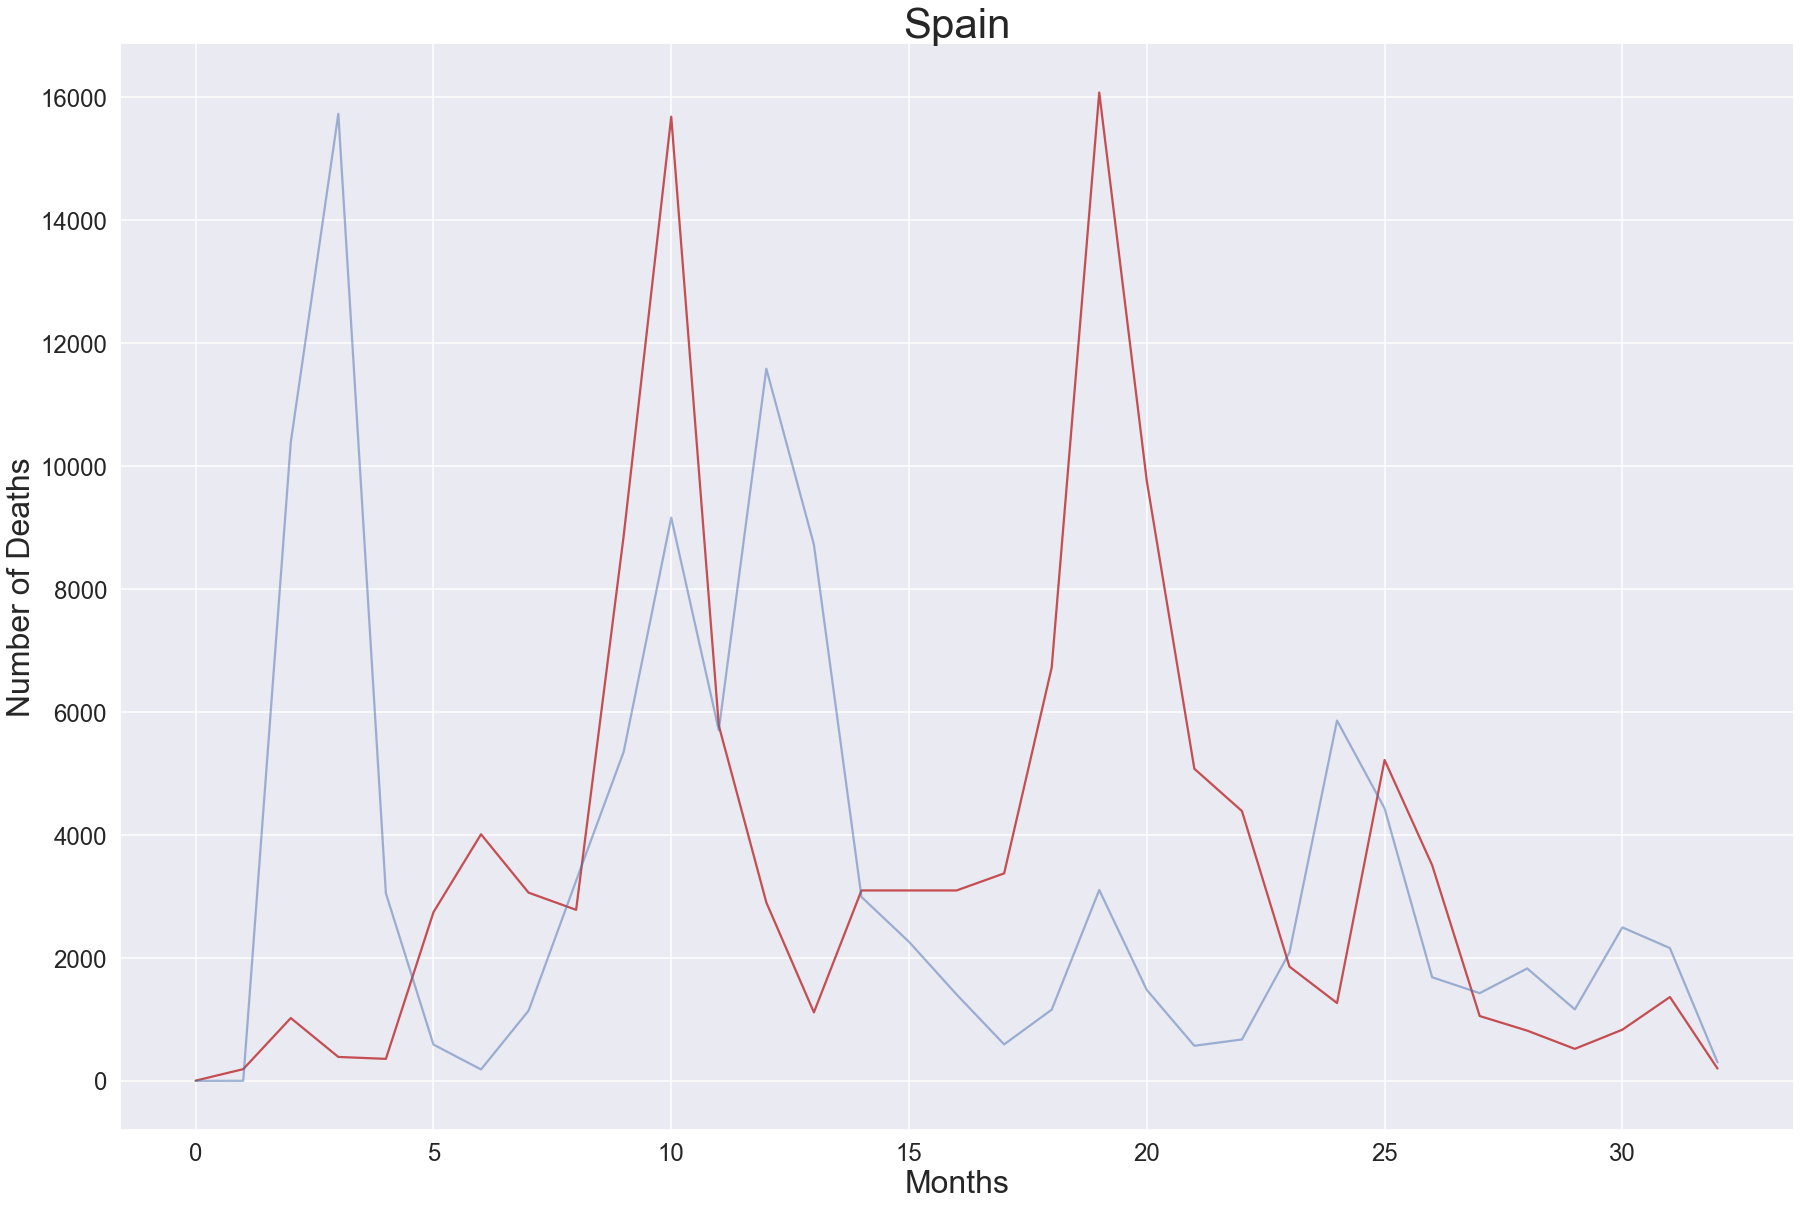

In [40]:
cluster_4_graph(3)

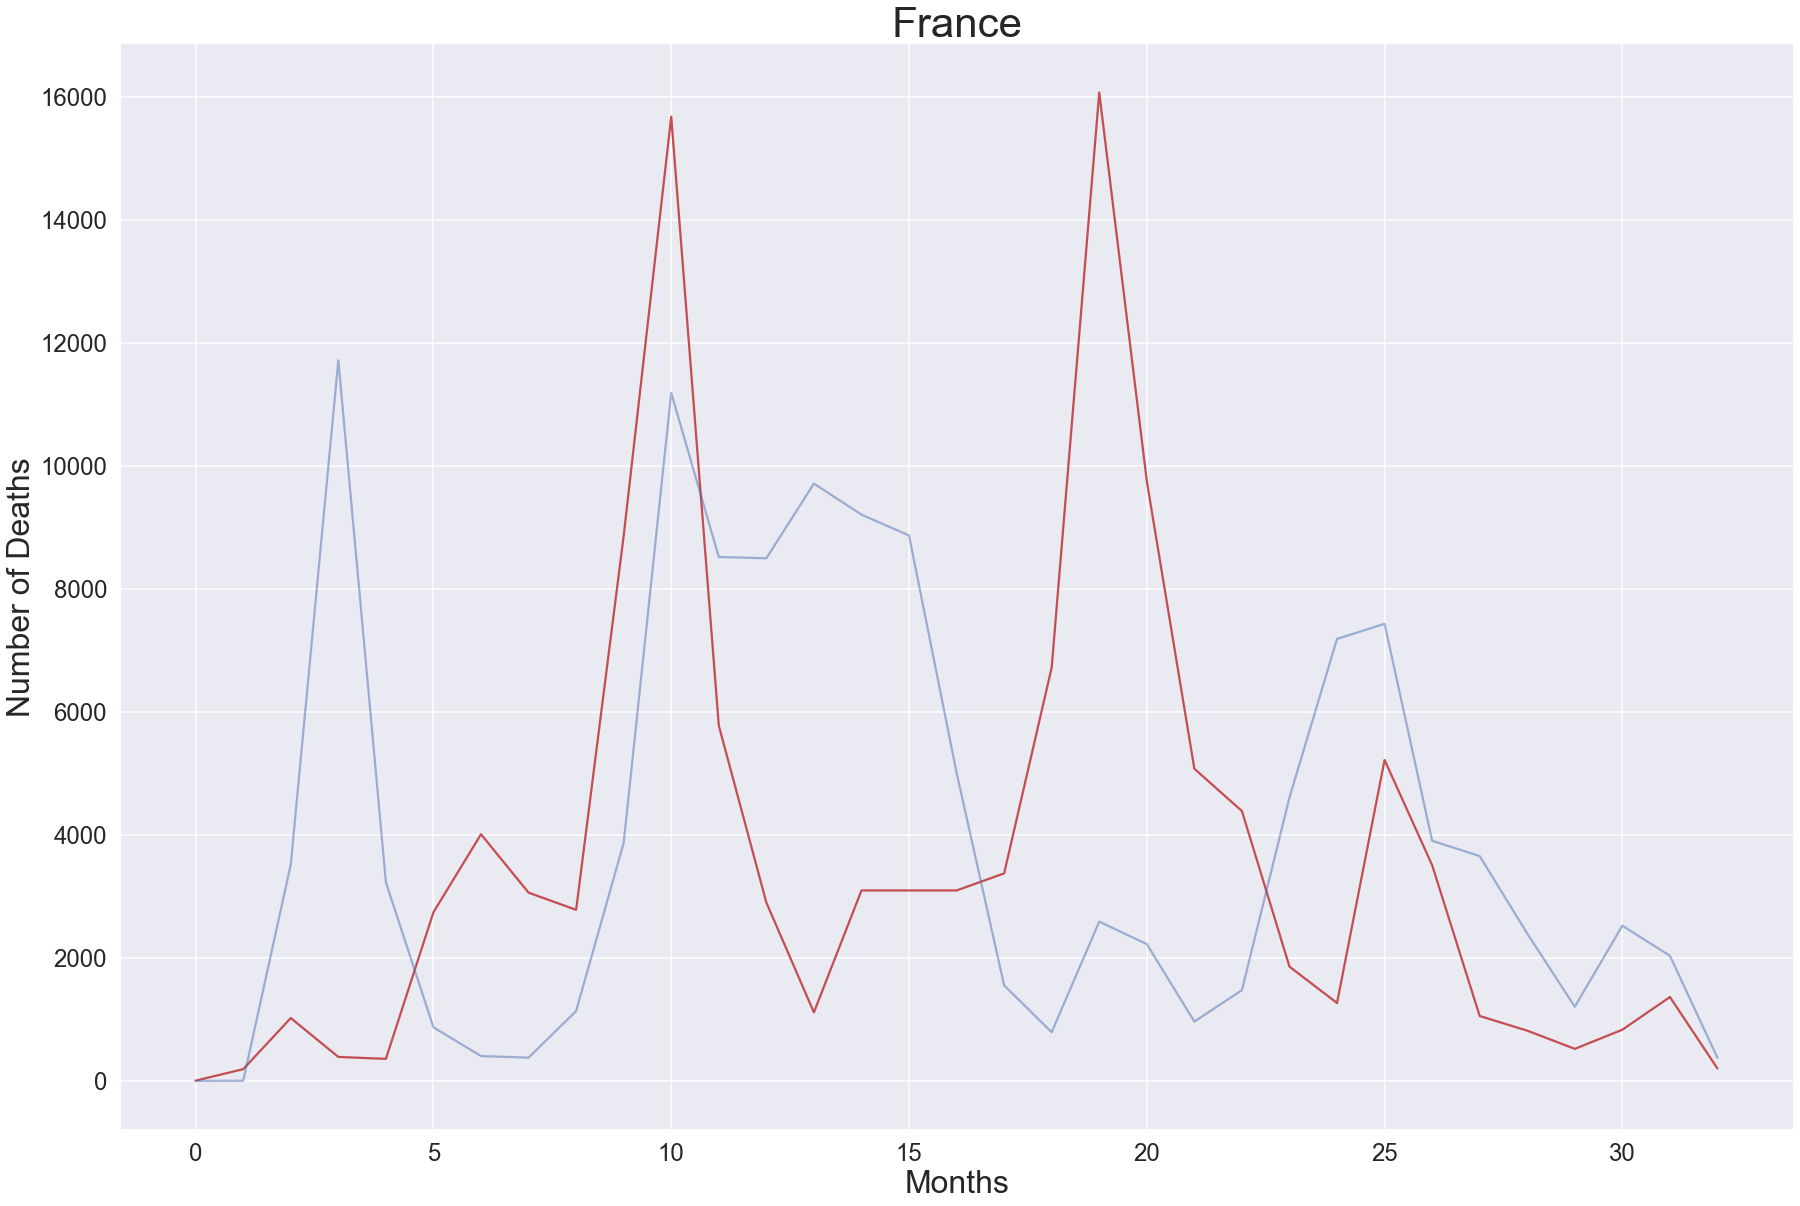

In [41]:
cluster_4_graph(4)

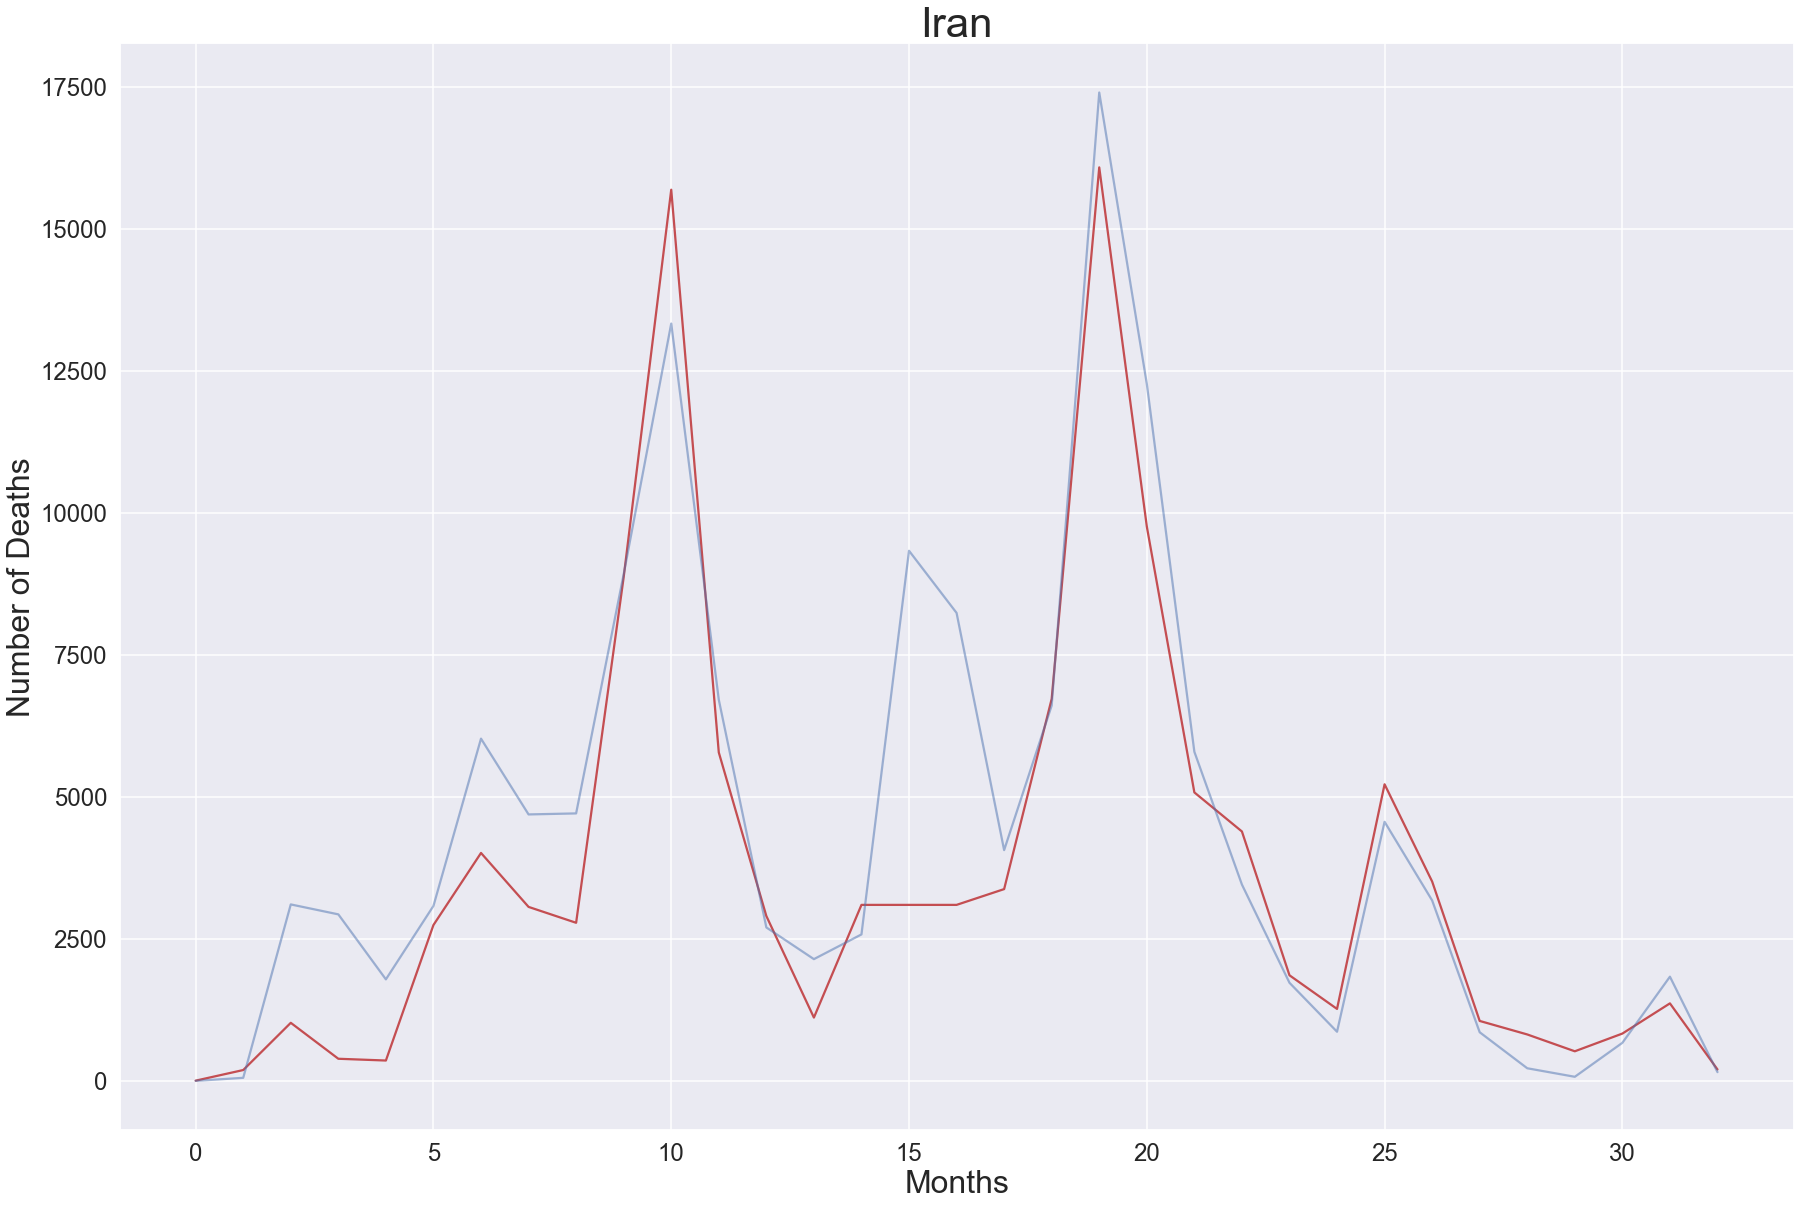

In [42]:
cluster_4_graph(5)

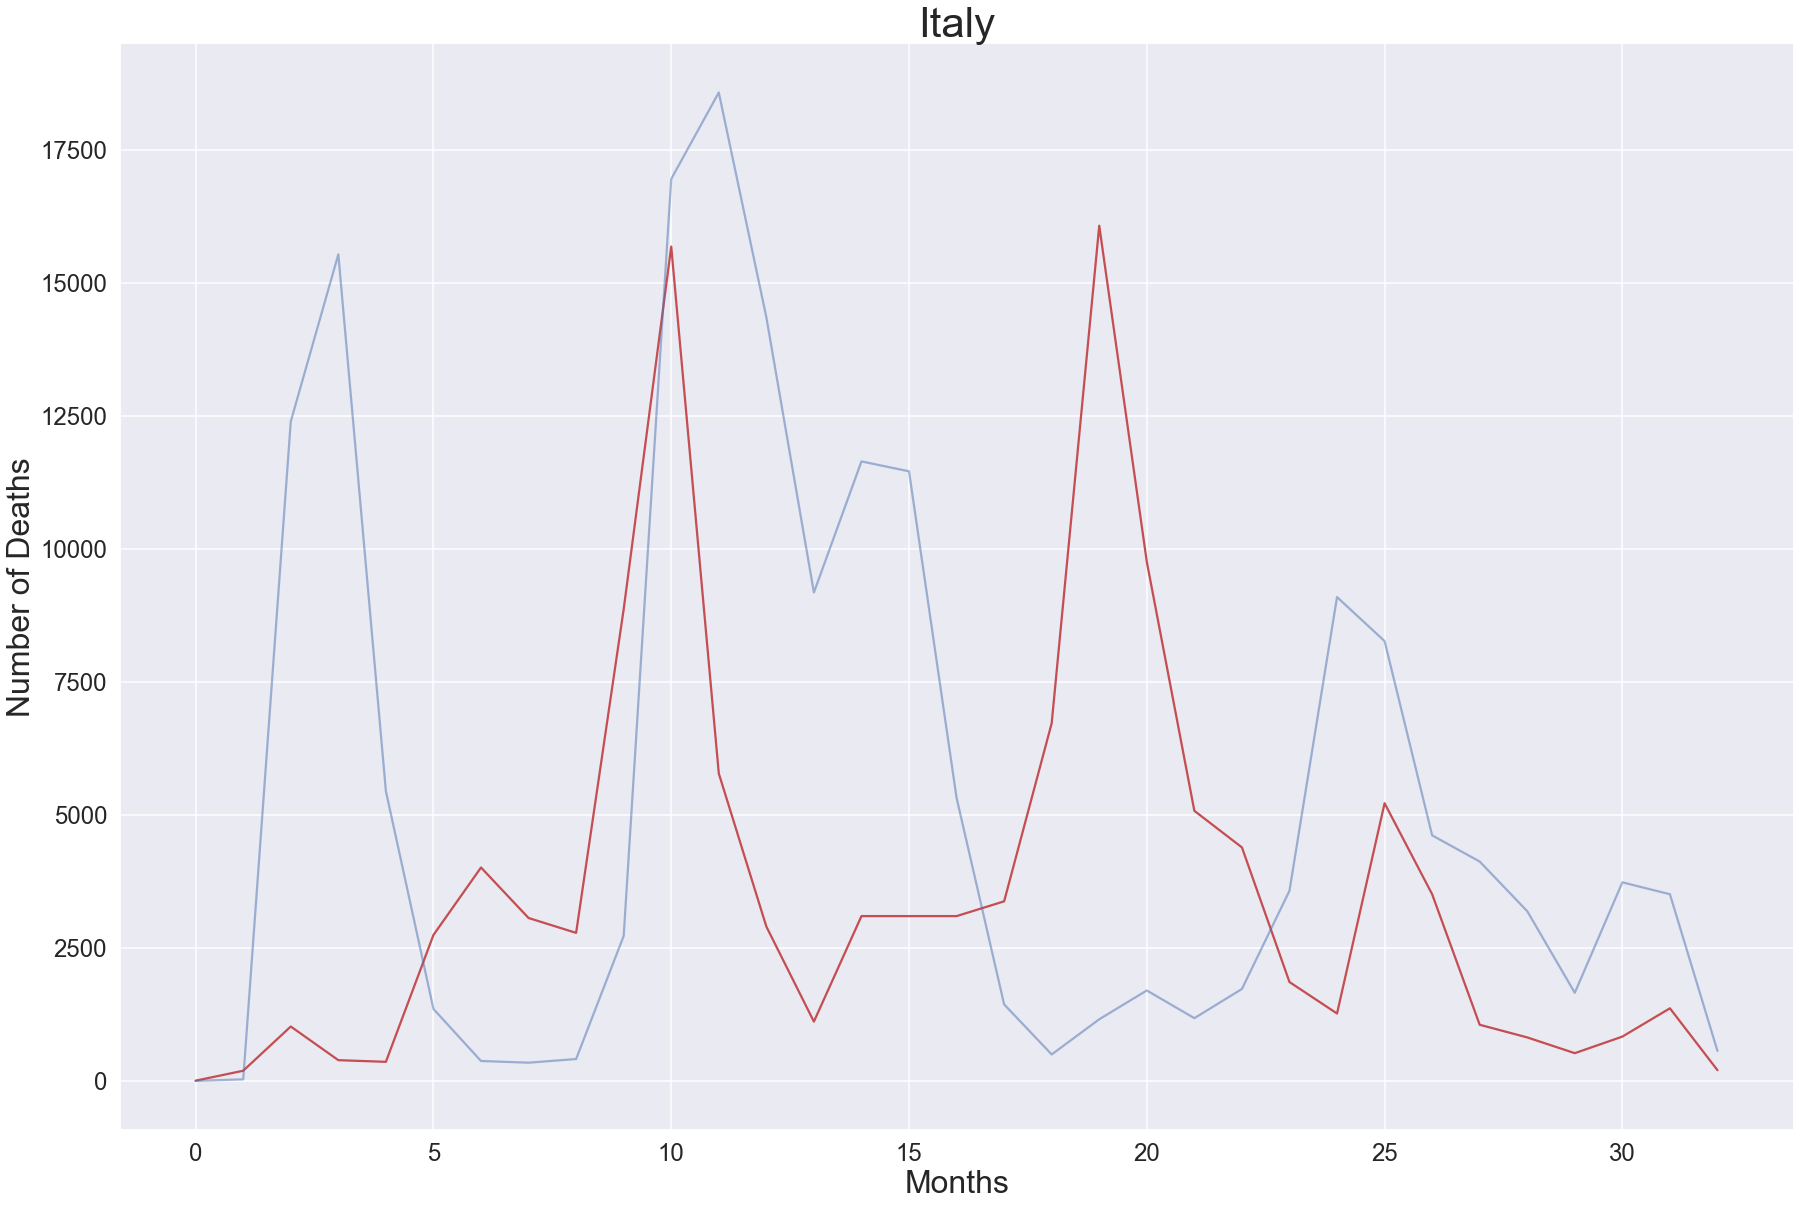

In [43]:
cluster_4_graph(6)

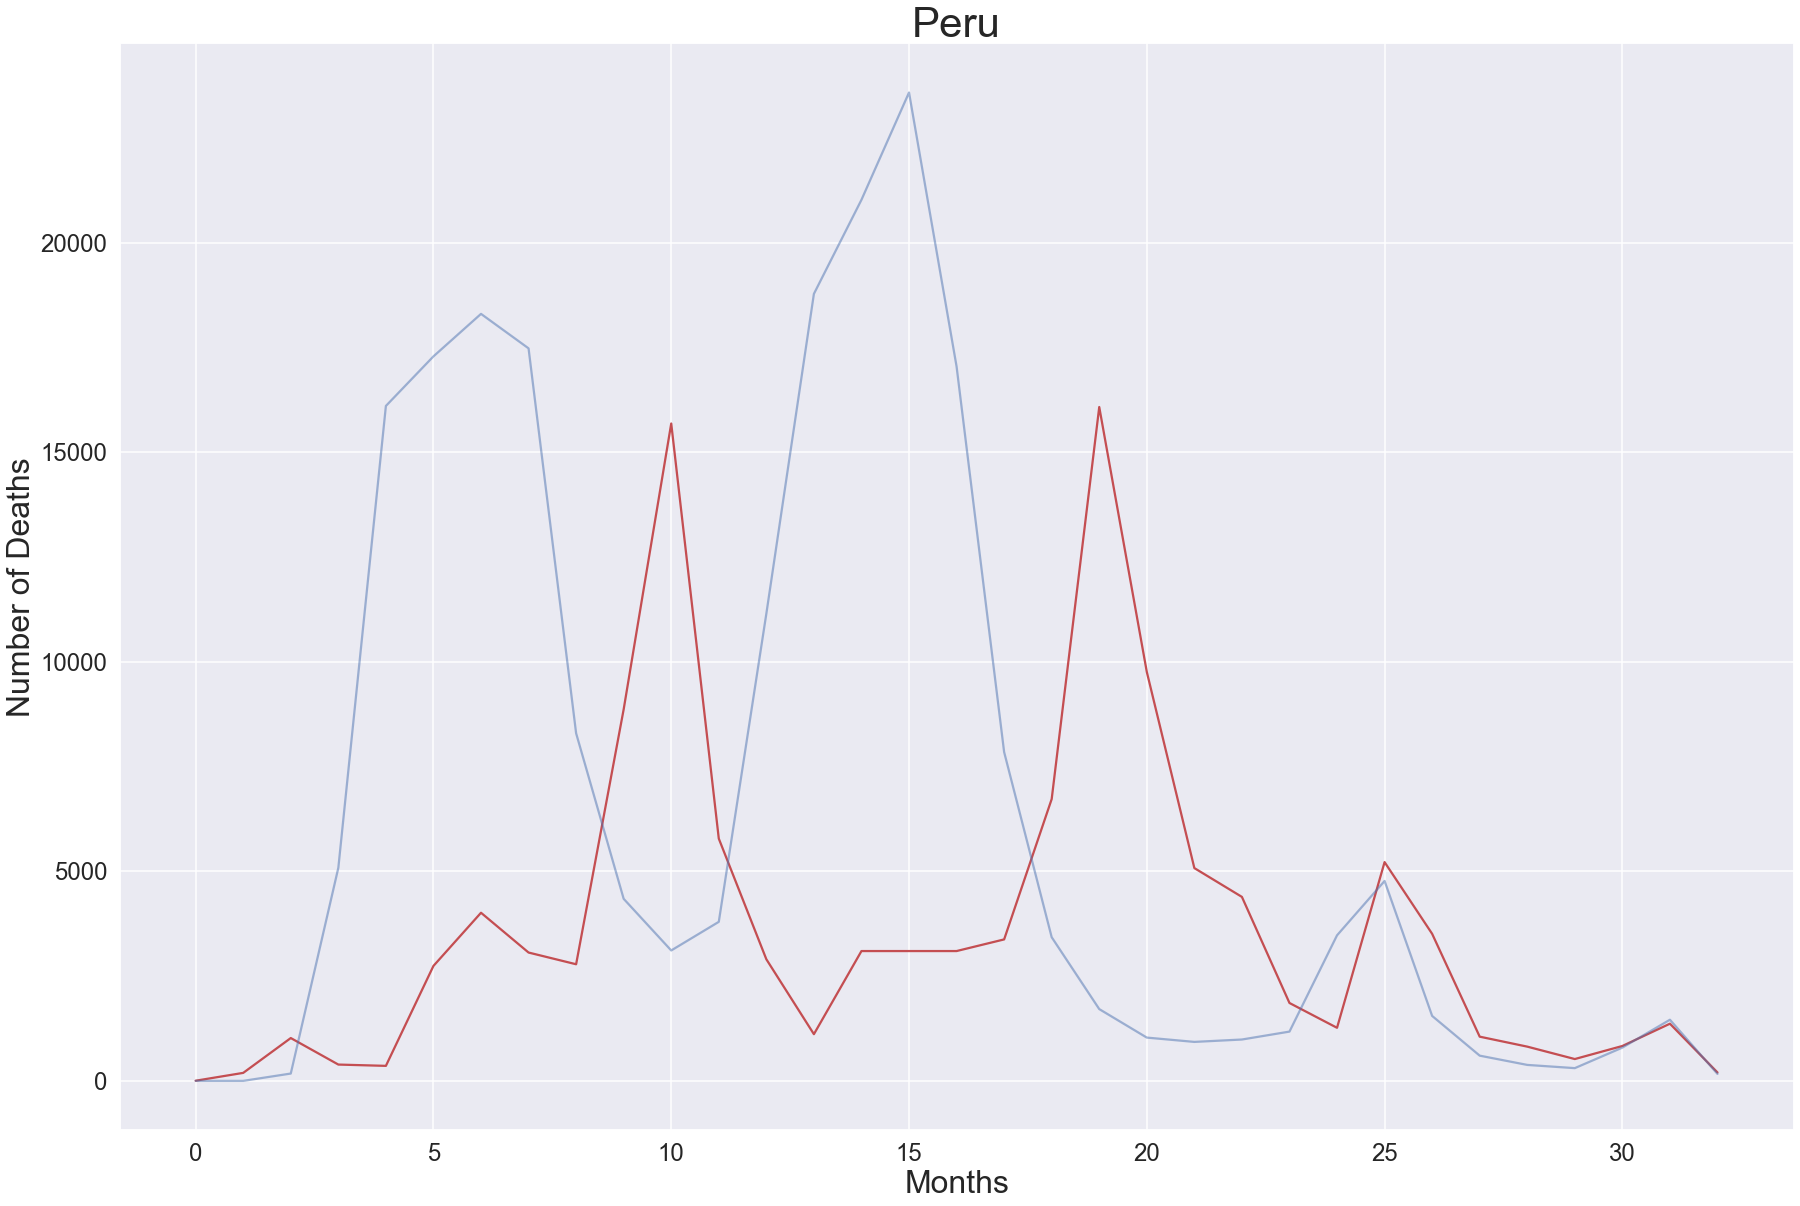

In [44]:
cluster_4_graph(7)

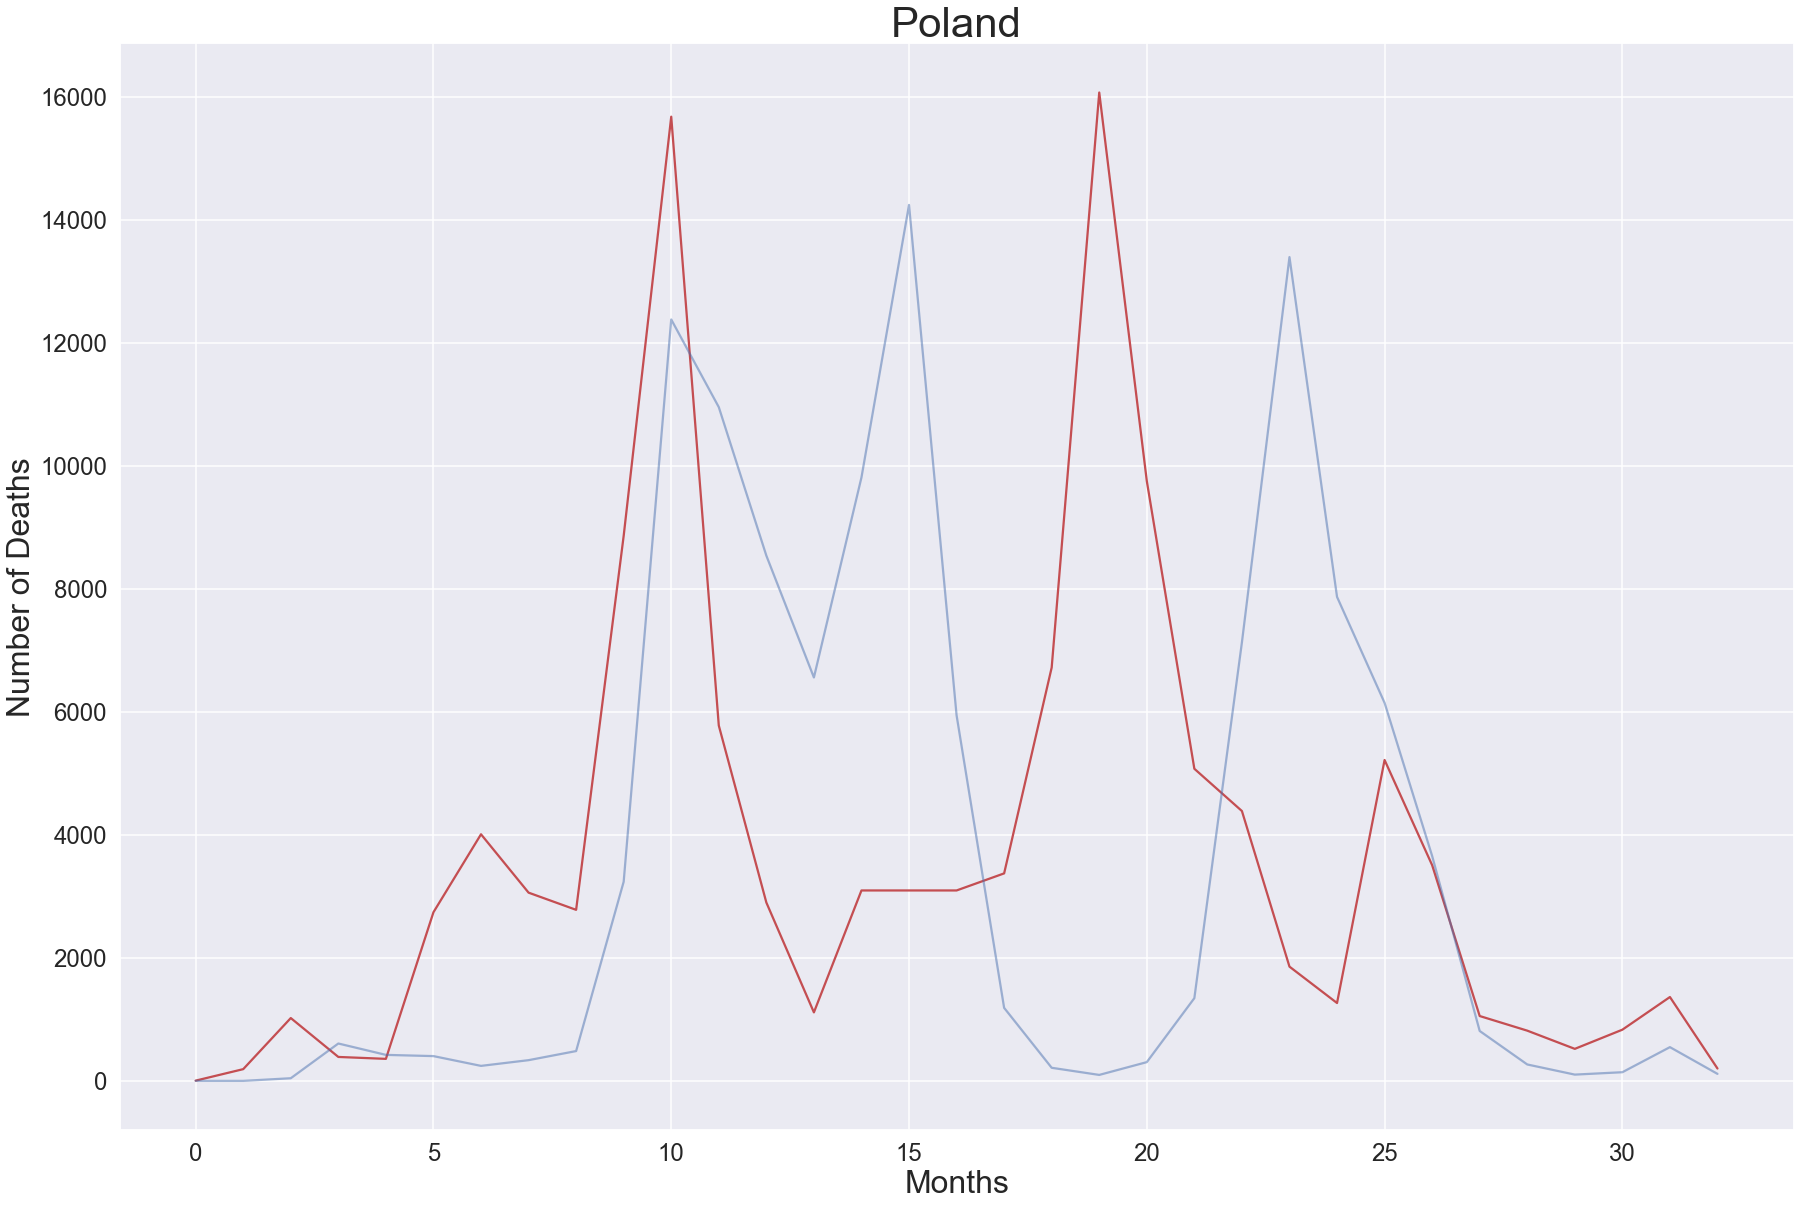

In [45]:
cluster_4_graph(8)

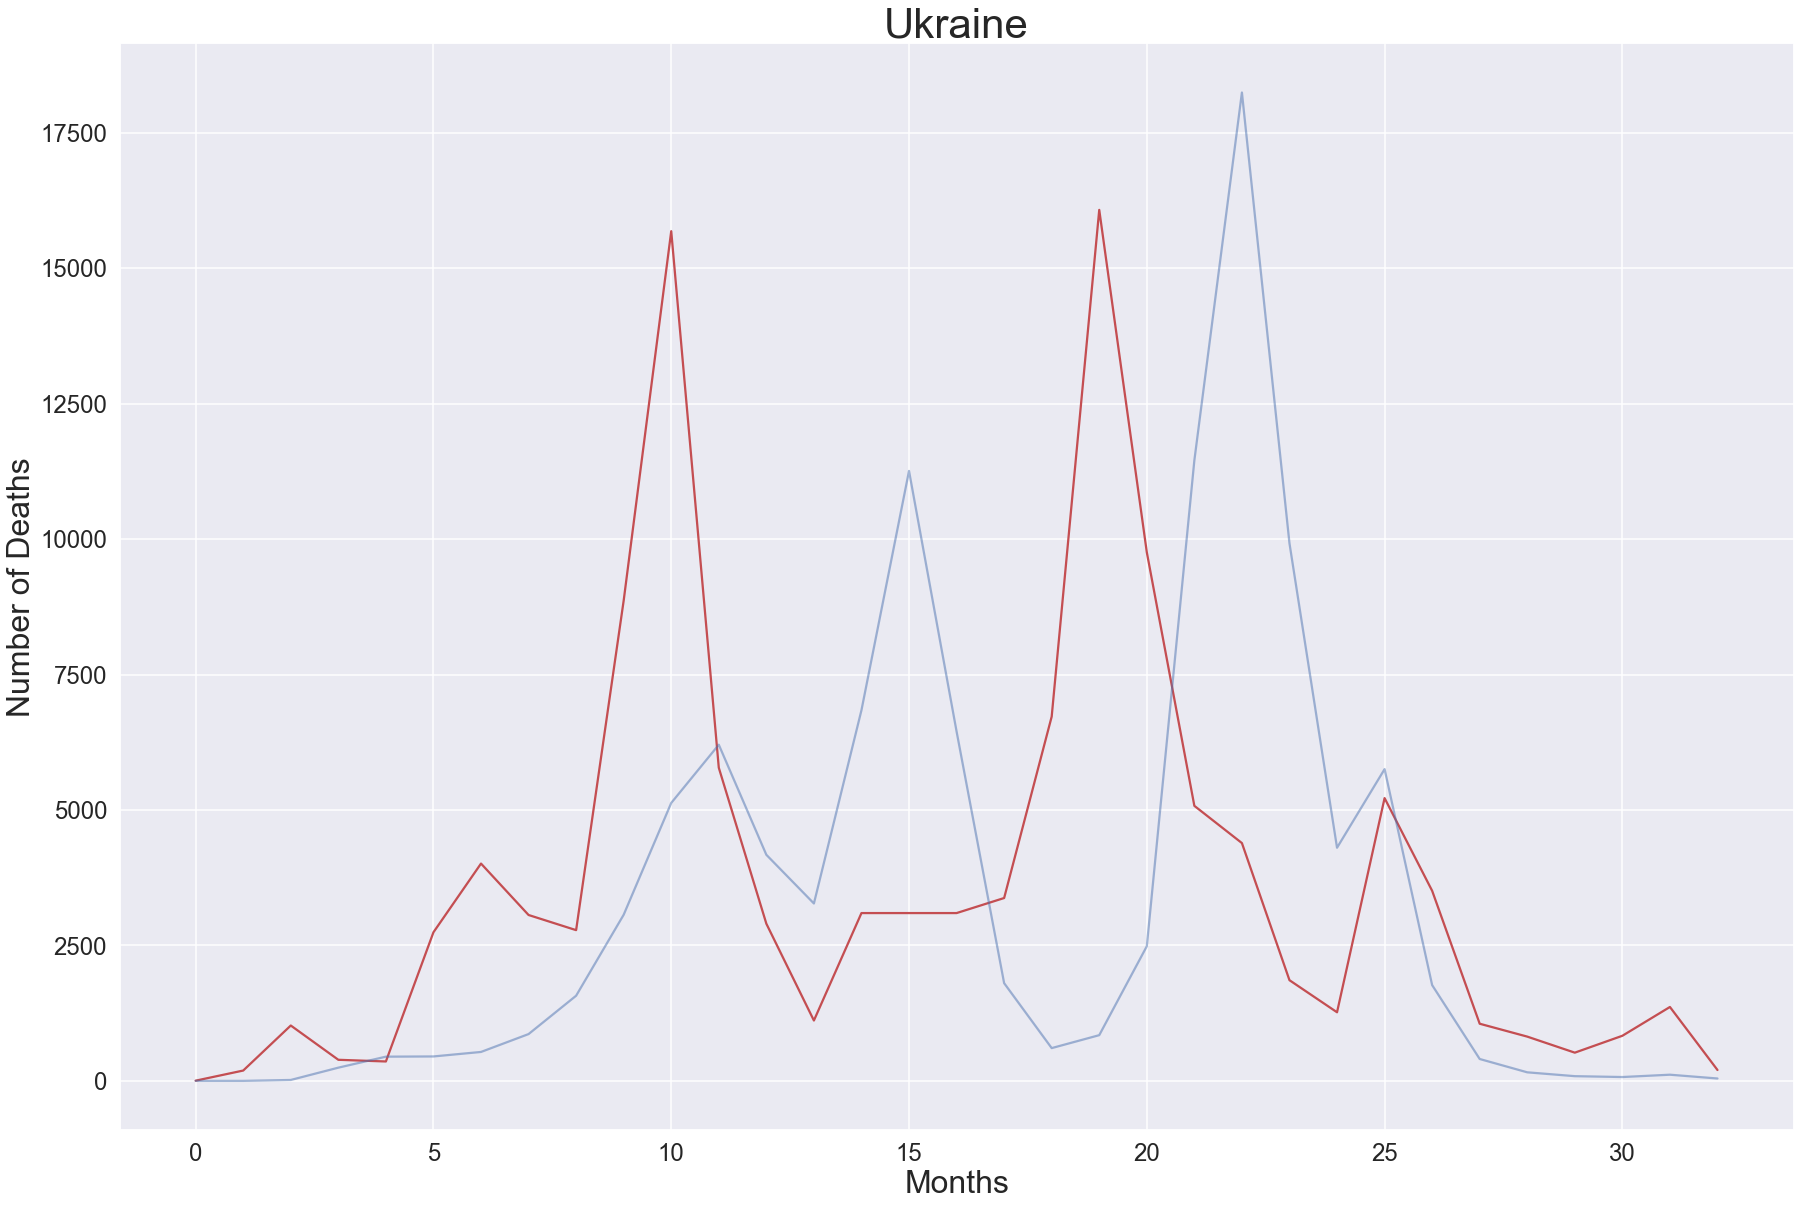

In [46]:
cluster_4_graph(9)

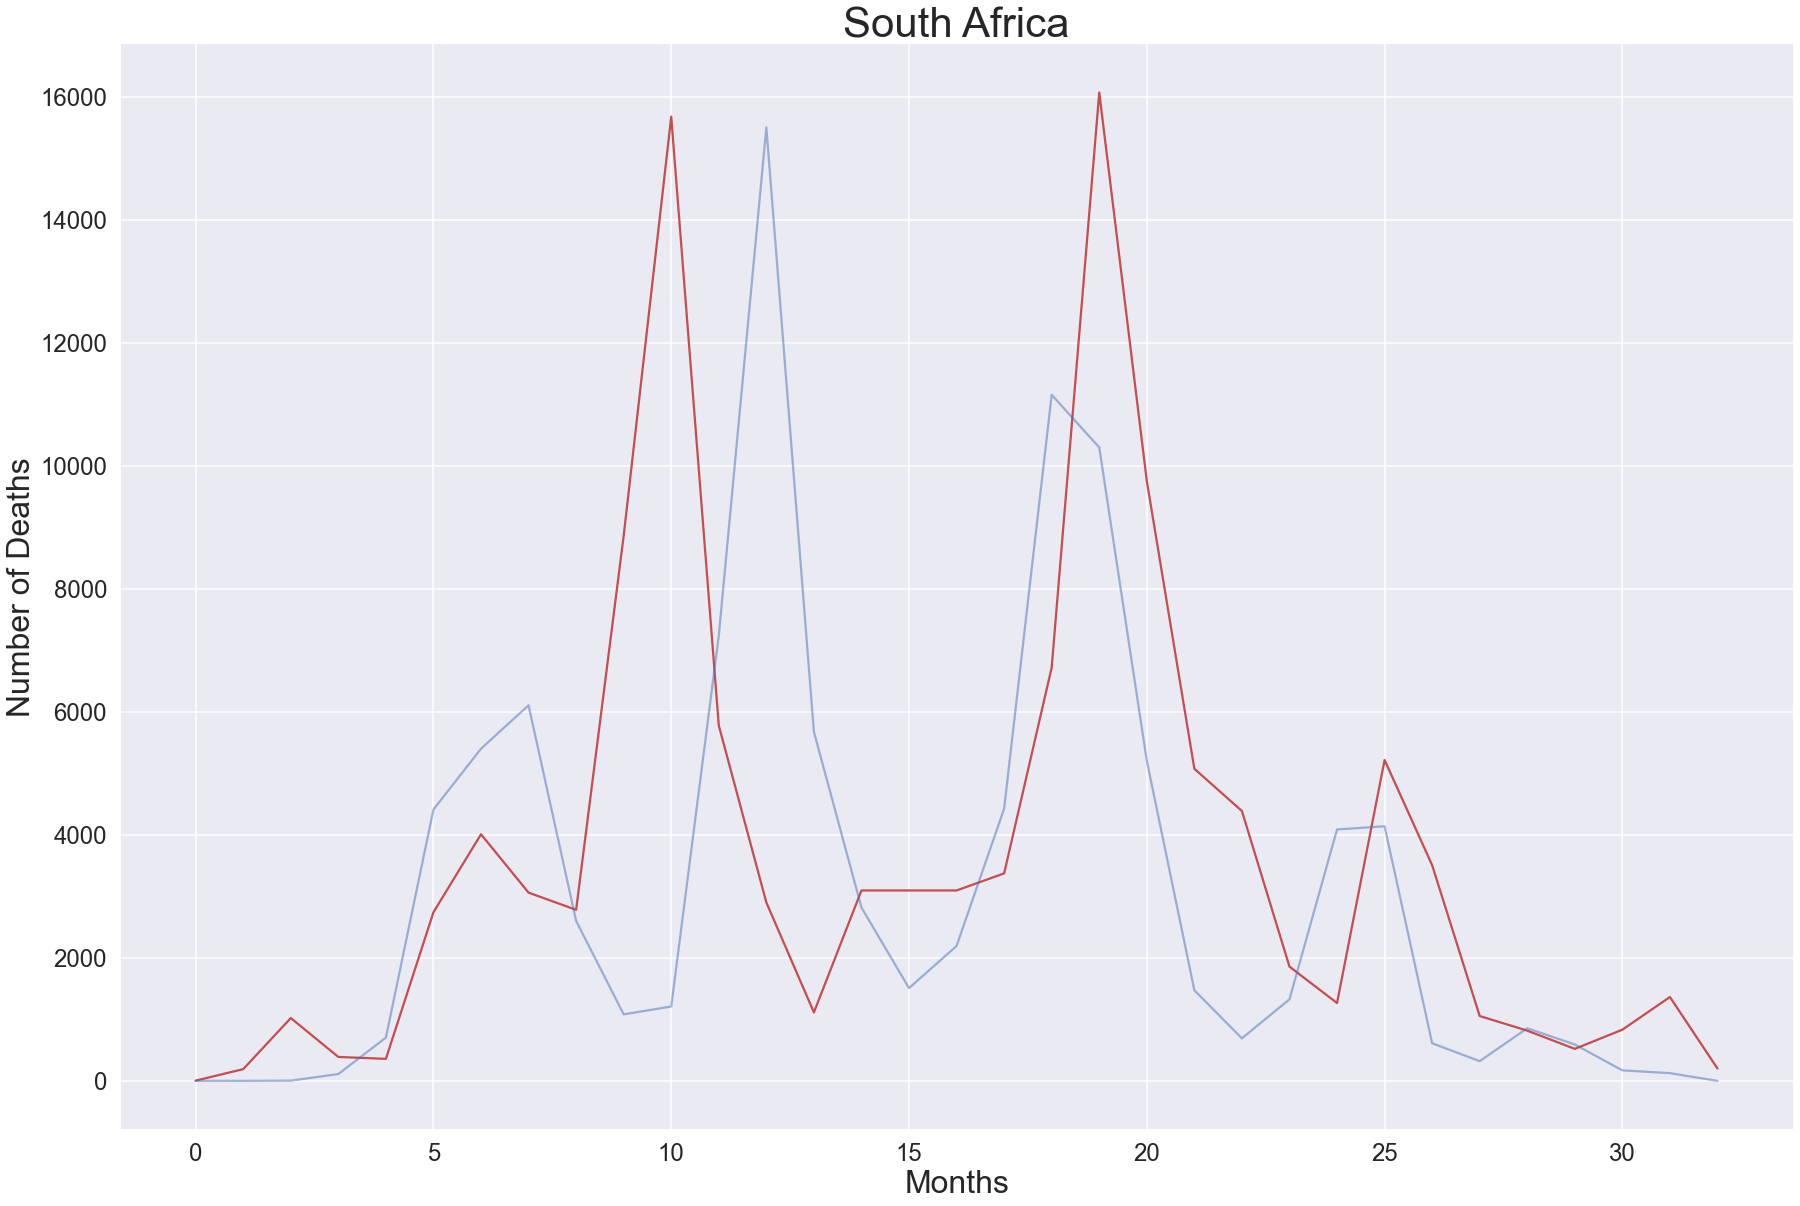

In [47]:
cluster_4_graph(10)

## Cluster 8

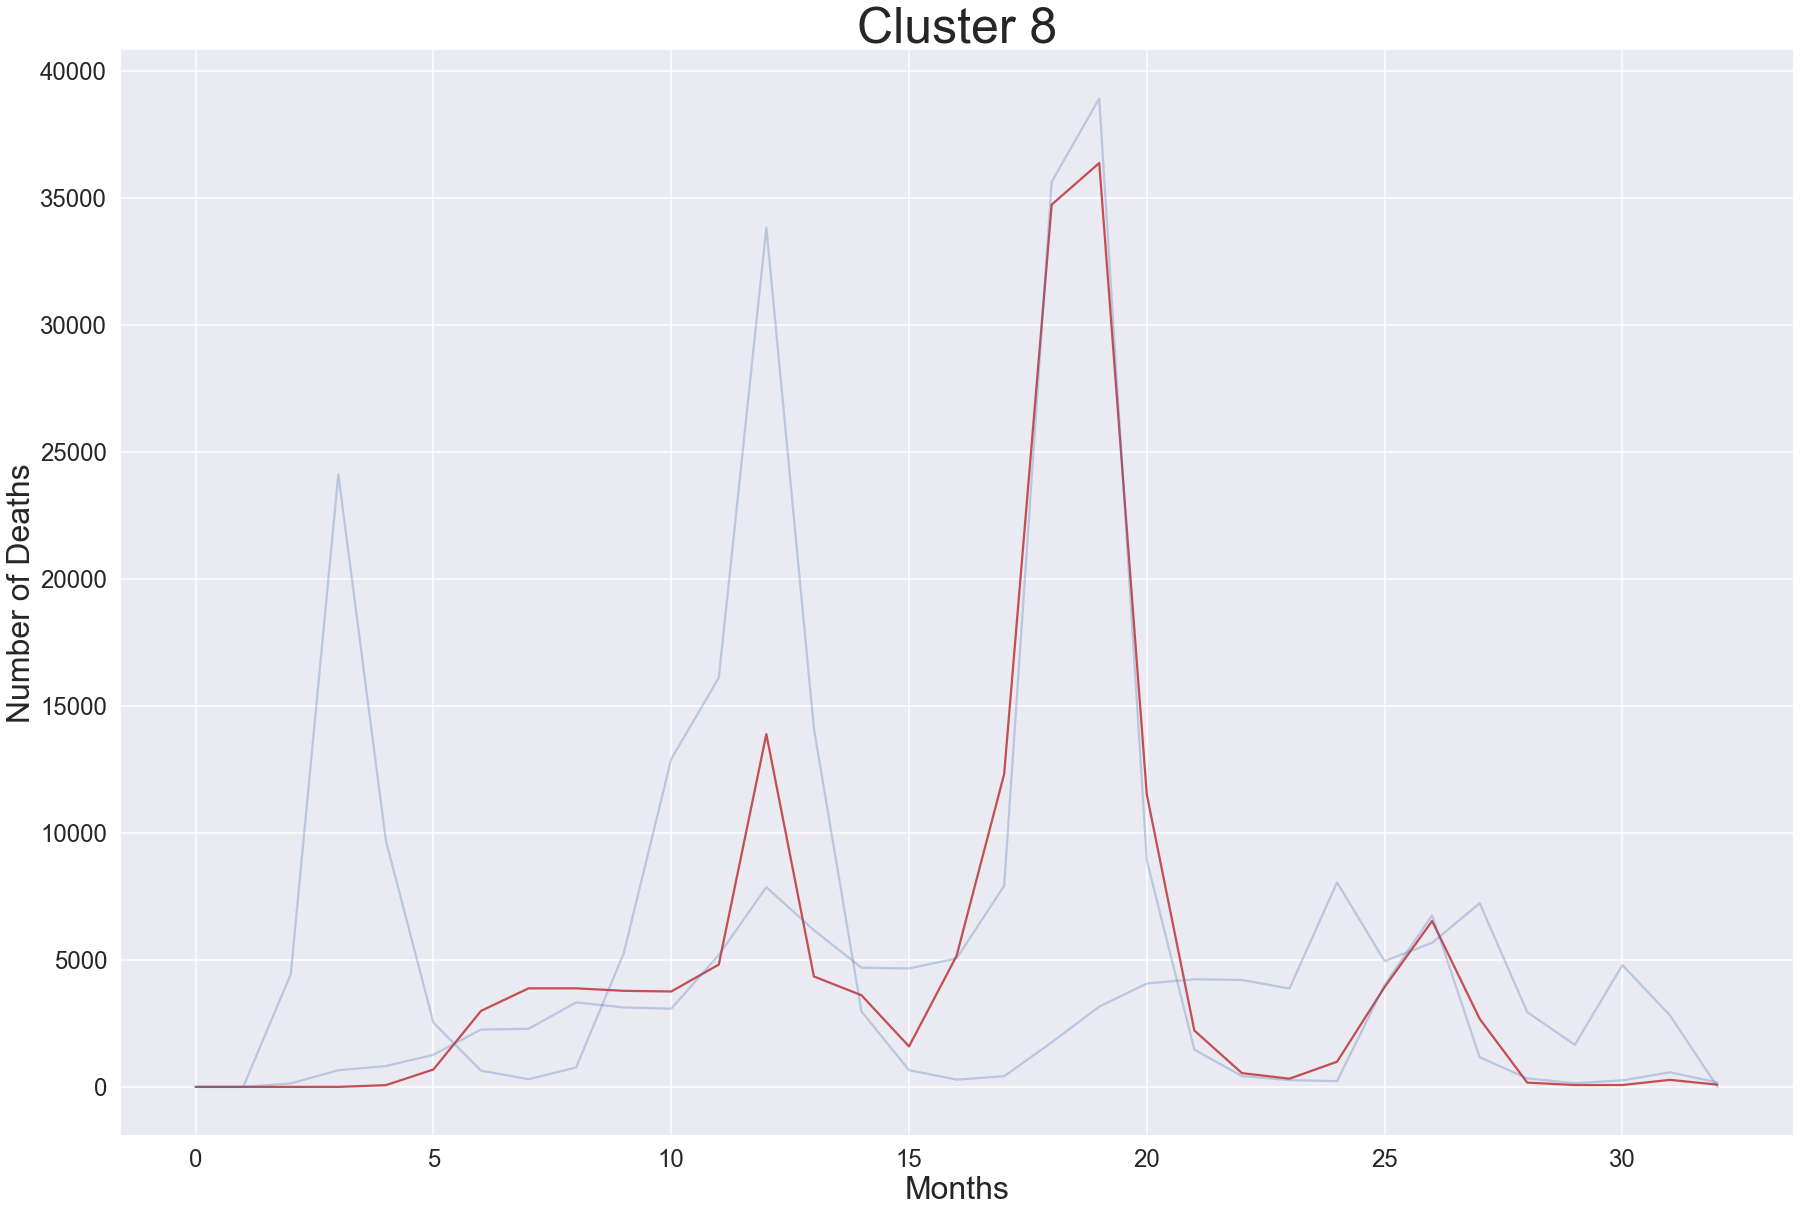

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(30,20))
plt.plot(km.cluster_centers_[7].ravel(), "r-")

for i in range(2):
    plt.plot(clustered_df[(clustered_df["cluster"] == 8)].iloc[:,1:-1].values[i],
            color = 'b', alpha = 0.3)
    
plt.title("Cluster 8", fontsize = 50)
plt.xlabel('Months', fontsize = 32)
plt.ylabel('Number of Deaths', fontsize = 32)
plt.xticks(fontsize  = 24)
plt.yticks(fontsize  = 24)

plt.show()

In [49]:
def cluster_8_graph(index):
    fig, axes = plt.subplots(1, 1, figsize=(30,20))
    plt.plot(km.cluster_centers_[7].ravel(), "r-")

    plt.plot(clustered_df[(clustered_df["cluster"] == 8)].iloc[:,1:-1].values[index],
                color = 'b', alpha = 0.5)

    plt.xlabel('Months', fontsize = 32)
    plt.ylabel('Number of Deaths', fontsize = 32)
    plt.xticks(fontsize  = 24)
    plt.yticks(fontsize  = 24)
    plt.title(cluster_8['country_name'][index], fontsize = 42)
    plt.show()

In [50]:
cluster_8

country_code    0    1       2        3       4       5       6       7  \
0           GB  0.0  0.0  4434.0  24107.0  9690.0  2524.0   639.0   302.0   
1           ID  0.0  0.0   136.0    656.0   821.0  1263.0  2255.0  2286.0   

        8  ...      25      26      27      28      29      30      31     32  \
0   765.0  ...  4953.0  5671.0  7229.0  2944.0  1654.0  4794.0  2819.0    0.0   
1  3323.0  ...  4015.0  6754.0  1168.0   334.0   146.0   256.0   573.0  175.0   

   cluster    country_name  
0        8  United Kingdom  
1        8       Indonesia  

[2 rows x 36 columns]

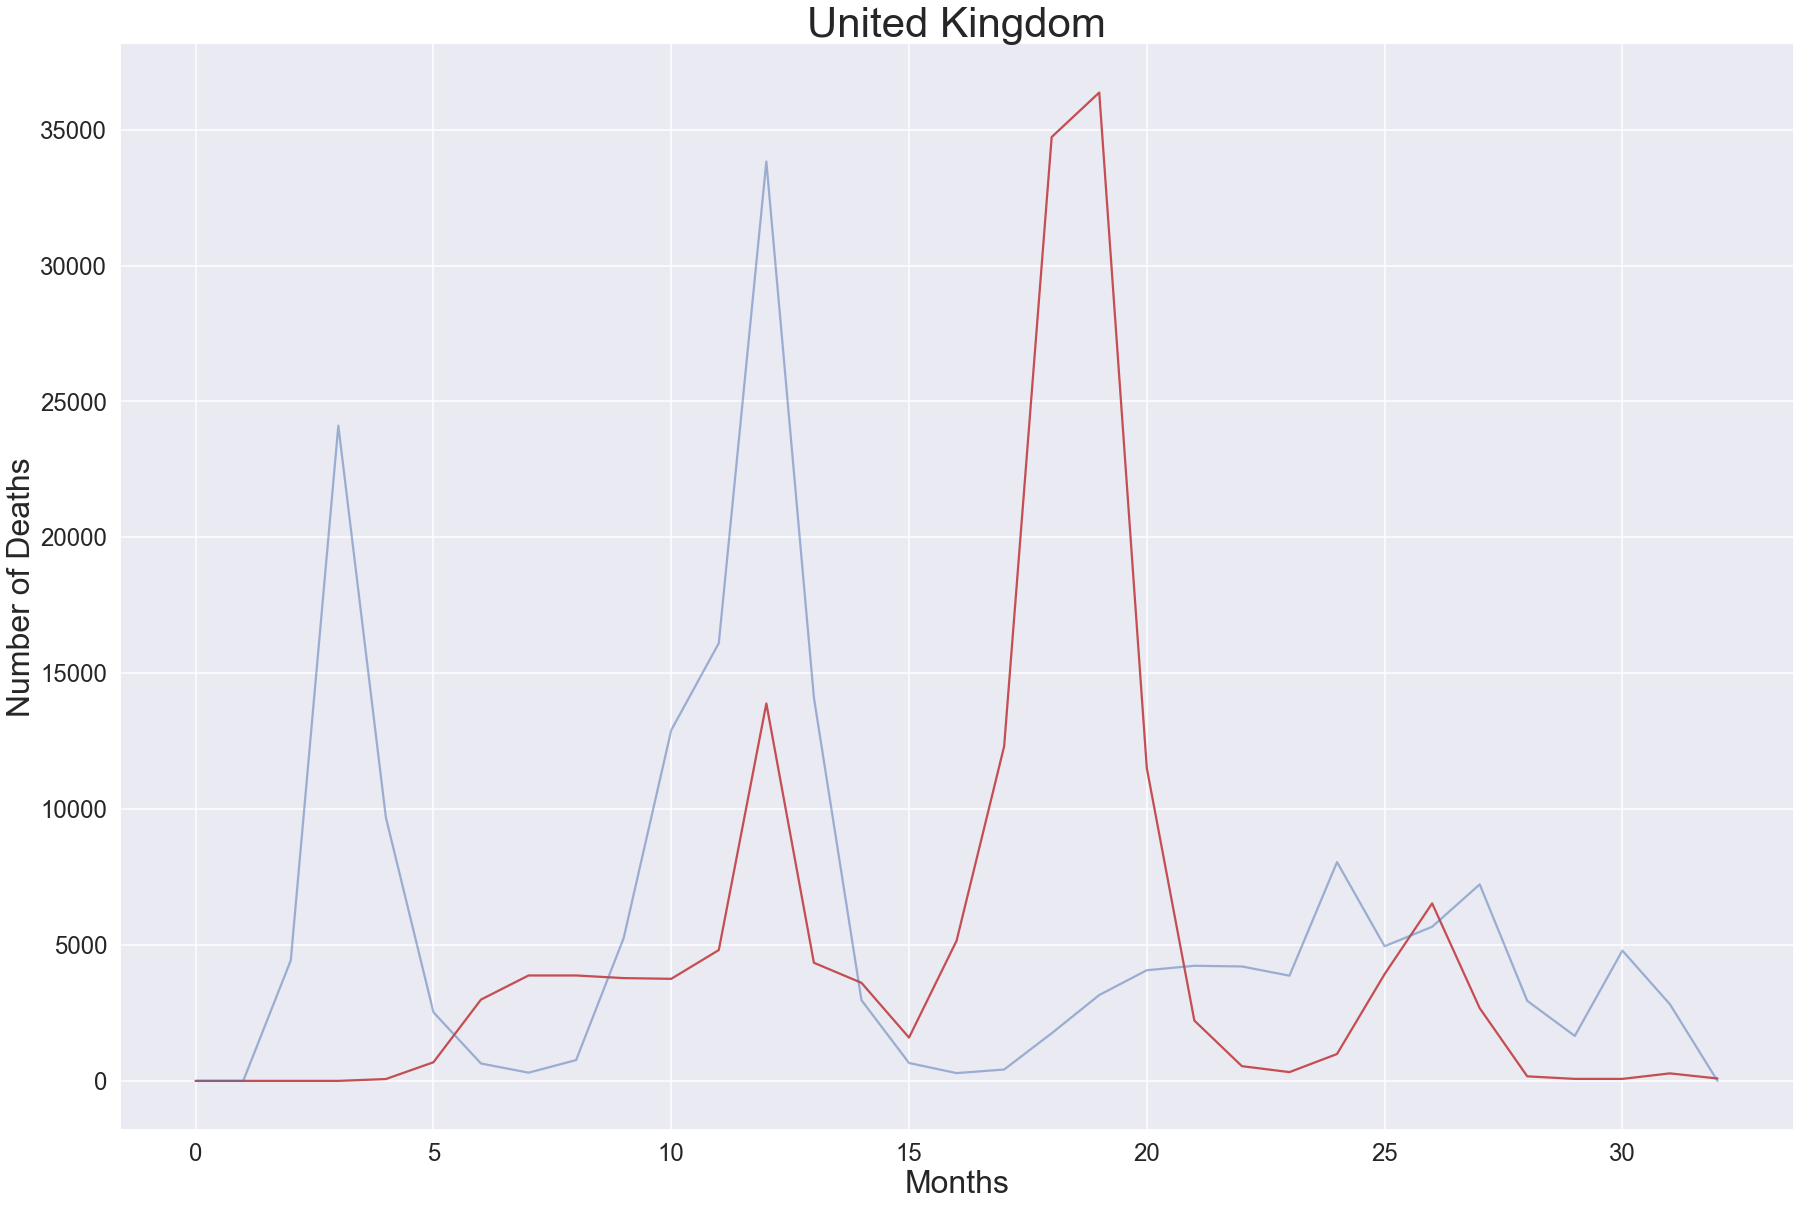

In [51]:
cluster_8_graph(0)

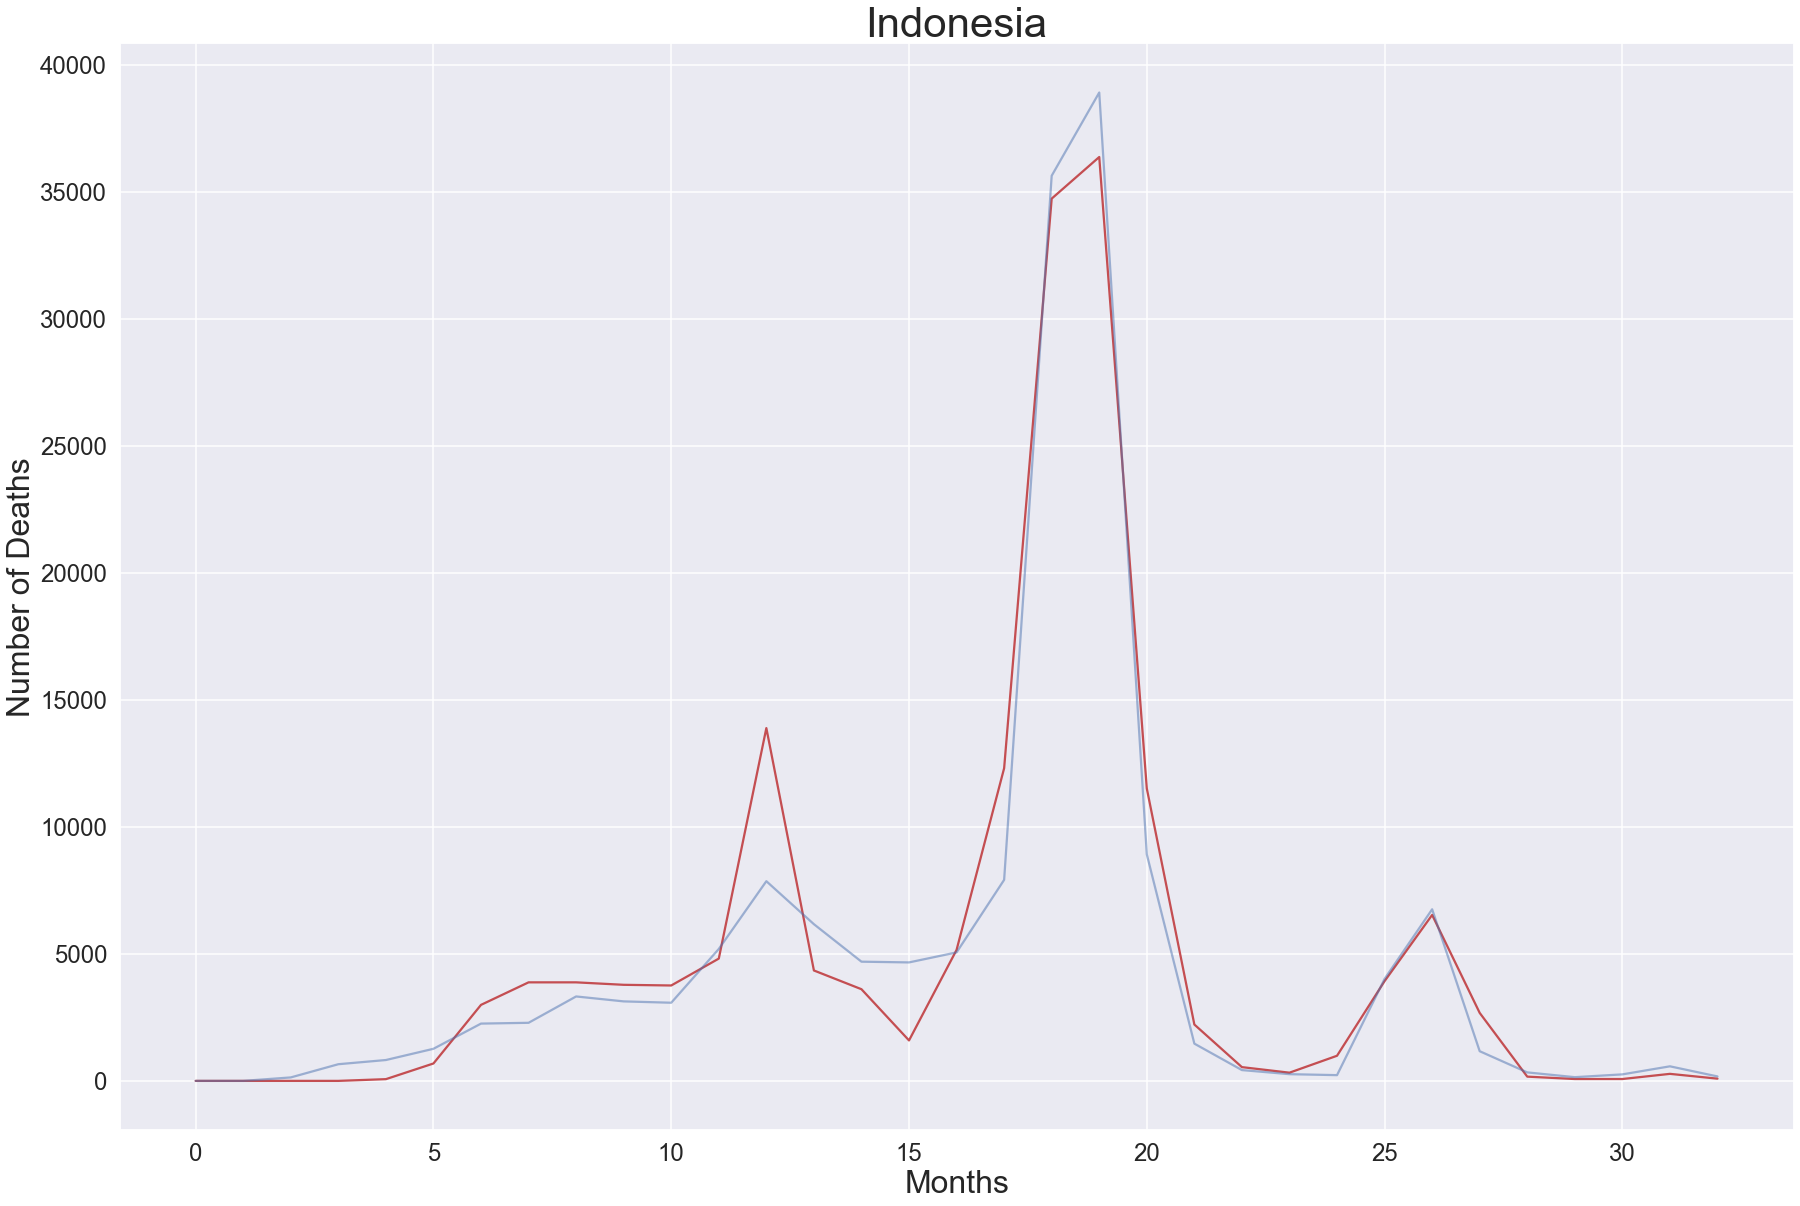

In [52]:
cluster_8_graph(1)

In [53]:
gov_res = pd.read_csv(r'datasets\government-response.csv')

In [54]:
gov_res_copy = gov_res
gov_res_copy['date'] = pd.to_datetime(gov_res_copy['date'])
gov_res_copy['month_year'] = gov_res_copy['date'].dt.to_period('M')
month_index_reference = gov_res_copy.groupby('month_year').agg('count').reset_index().rename(columns = {'month_year':'months'}).reset_index().iloc[:,:2]
month_index_reference

index   months
0       0  2020-01
1       1  2020-02
2       2  2020-03
3       3  2020-04
4       4  2020-05
5       5  2020-06
6       6  2020-07
7       7  2020-08
8       8  2020-09
9       9  2020-10
10     10  2020-11
11     11  2020-12
12     12  2021-01
13     13  2021-02
14     14  2021-03
15     15  2021-04
16     16  2021-05
17     17  2021-06
18     18  2021-07
19     19  2021-08
20     20  2021-09
21     21  2021-10
22     22  2021-11
23     23  2021-12
24     24  2022-01
25     25  2022-02
26     26  2022-03
27     27  2022-04
28     28  2022-05
29     29  2022-06
30     30  2022-07

## Government Response by Month

In [55]:
cluster_4_centroid = km.cluster_centers_[4].ravel()
cluster_4_centroid

array([0.0000e+00, 2.0000e+00, 3.2050e+03, 4.3552e+04, 3.8166e+04,
       1.9826e+04, 3.0172e+04, 3.0408e+04, 2.1709e+04, 2.3821e+04,
       4.1646e+04, 8.1381e+04, 9.5871e+04, 5.9718e+04, 3.0115e+04,
       1.9494e+04, 1.5702e+04, 9.3340e+03, 9.3620e+03, 3.3253e+04,
       5.4387e+04, 4.2827e+04, 3.0237e+04, 3.7636e+04, 6.1691e+04,
       6.1235e+04, 3.0650e+04, 1.1582e+04, 9.4810e+03, 1.0325e+04,
       1.2082e+04, 1.4212e+04, 2.5980e+03])

In [56]:
cluster_8

country_code    0    1       2        3       4       5       6       7  \
0           GB  0.0  0.0  4434.0  24107.0  9690.0  2524.0   639.0   302.0   
1           ID  0.0  0.0   136.0    656.0   821.0  1263.0  2255.0  2286.0   

        8  ...      25      26      27      28      29      30      31     32  \
0   765.0  ...  4953.0  5671.0  7229.0  2944.0  1654.0  4794.0  2819.0    0.0   
1  3323.0  ...  4015.0  6754.0  1168.0   334.0   146.0   256.0   573.0  175.0   

   cluster    country_name  
0        8  United Kingdom  
1        8       Indonesia  

[2 rows x 36 columns]

In [57]:
# UK array
np.array(cluster_8.iloc[0,1:-2])

array([0.0, 0.0, 4434.0, 24107.0, 9690.0, 2524.0, 639.0, 302.0, 765.0,
       5255.0, 12904.0, 16104.0, 33827.0, 14103.0, 2971.0, 658.0, 286.0,
       418.0, 1752.0, 3159.0, 4071.0, 4235.0, 4210.0, 3870.0, 8050.0,
       4953.0, 5671.0, 7229.0, 2944.0, 1654.0, 4794.0, 2819.0, 0.0],
      dtype=object)

In [58]:
# Indo array
len(np.array(cluster_8.iloc[1,1:-2]))

33

In [59]:
import fastdtw

In [60]:
additional_zeroes = [0,0,0,0,0,0,0]


clust_8_adjusted = pd.DataFrame({
    'centroid' : np.append(km.cluster_centers_[7].ravel(),additional_zeroes),
    'uk': np.append(additional_zeroes,np.array(cluster_8.iloc[0,1:-2])),
    'indo': np.append(np.array(cluster_8.iloc[1,1:-2]),additional_zeroes)
})

clust_8_adjusted = clust_8_adjusted.reset_index() 
# clust_8_adjusted['new_index'] = clust_8_adjusted['index'] -8
# clust_8_adjusted
clust_8_adjusted
clust_8_adjusted['new_index'] = clust_8_adjusted['index'] -7
clust_8_adjusted


# np.append(additional_zeroes,km.cluster_centers_[7].ravel())
# additional_zeroes

index      centroid     uk   indo  new_index
0       0      0.000000      0      0         -7
1       1      0.000000      0      0         -6
2       2      0.000000      0    136         -5
3       3      0.000000      0    656         -4
4       4     68.000000      0    821         -3
5       5    685.000000      0   1263         -2
6       6   2991.666667      0   2255         -1
7       7   3878.500000      0   2286          0
8       8   3878.500000      0   3323          1
9       9   3781.500000   4434   3129          2
10     10   3755.000000  24107   3076          3
11     11   4813.500000   9690   5193          4
12     12  13885.666667   2524   7860          5
13     13   4346.000000    639   6168          6
14     14   3608.000000    302   4692          7
15     15   1592.250000    765   4663          8
16     16   5156.000000   5255   5057          9
17     17  12307.000000  12904   7913         10
18     18  34727.500000  16104  35628         11
19     19  36365.500000  33827  38904         12
20     20  11509.500000  14103   8916         13
21     21   2218.500000   2971   1466         14
22     22    541.500000    658    425         15
23     23    322.666667    286    264         16
24     24    989.000000    418    226         17
25     25   3926.666667   1752   4015         18
26     26   6531.400000   3159   6754         19
27     27   2675.800000   4071   1168         20
28     28    167.000000   4235    334         21
29     29     73.000000   4210    146         22
30     30     73.000000   3870    256         23
31     31    276.333333   8050    573         24
32     32     87.500000   4953    175         25
33     33      0.000000   5671      0         26
34     34      0.000000   7229      0         27
35     35      0.000000   2944      0         28
36     36      0.000000   1654      0         29
37     37      0.000000   4794      0         30
38     38      0.000000   2819      0         31
39     39      0.000000      0      0         32

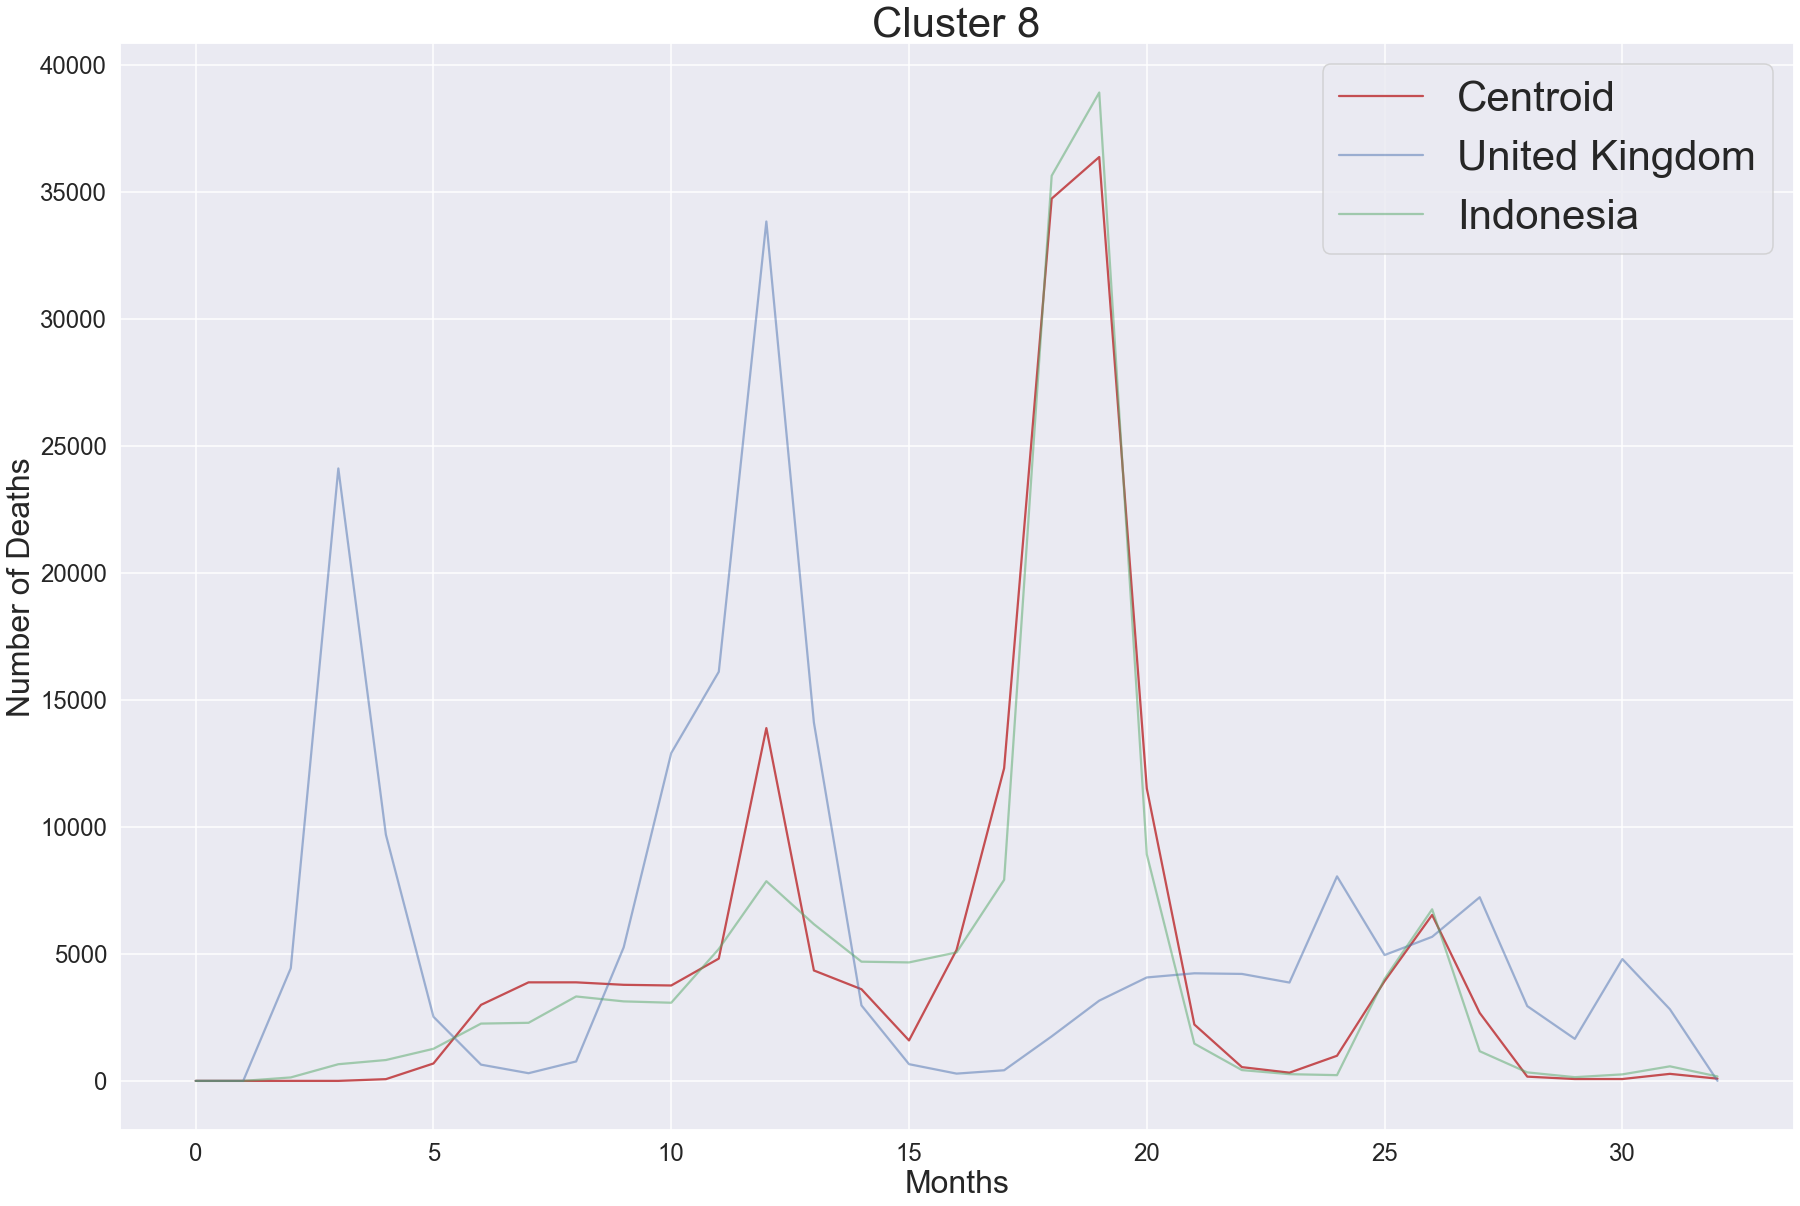

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(30,20))
plt.plot(km.cluster_centers_[7].ravel(), "r-")

plt.plot(clustered_df[(clustered_df["cluster"] == 8)].iloc[:,1:-1].values[0],
            color = 'b', alpha = 0.5)

plt.plot(clustered_df[(clustered_df["cluster"] == 8)].iloc[:,1:-1].values[1],
            color = 'g', alpha = 0.5)

plt.xlabel('Months', fontsize = 32)
plt.ylabel('Number of Deaths', fontsize = 32)
plt.xticks(fontsize  = 24)
plt.yticks(fontsize  = 24)
plt.title("Cluster 8", fontsize = 42)
plt.legend(["Centroid", "United Kingdom", "Indonesia"], loc=0, frameon=True,
          prop={'size': 42})
plt.show()

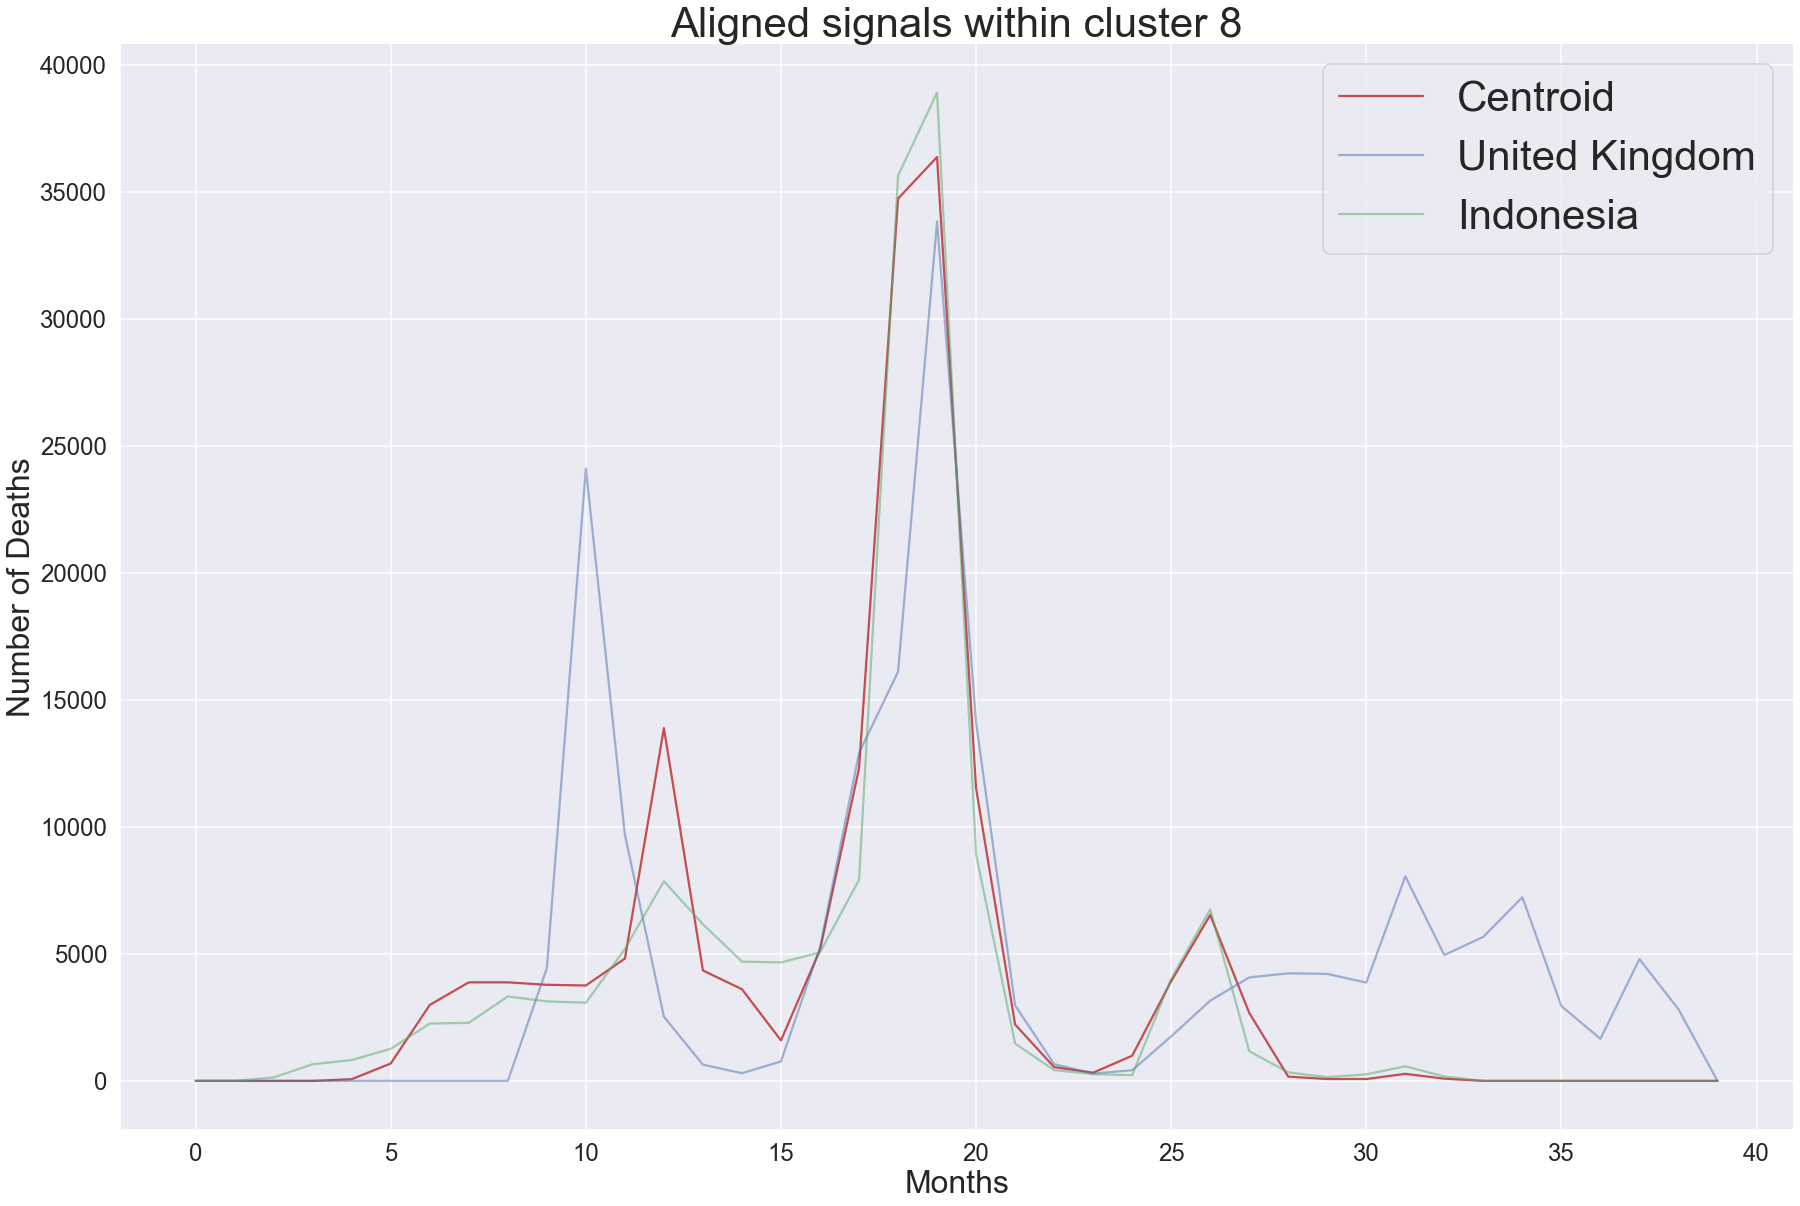

In [62]:
fig, axes = plt.subplots(1, 1, figsize=(30,20))
plt.plot(clust_8_adjusted['centroid'], "r-")
plt.plot(clust_8_adjusted['uk'],
                color = 'b', alpha = 0.5)
plt.plot(clust_8_adjusted['indo'],
                color = 'g', alpha = 0.5)
plt.xlabel('Months', fontsize = 32)
plt.ylabel('Number of Deaths', fontsize = 32)
plt.xticks(fontsize  = 24)
plt.yticks(fontsize  = 24)
plt.title("Aligned signals within cluster 8", fontsize = 42)
plt.legend(["Centroid", "United Kingdom", "Indonesia"], loc=0, frameon=True,
          prop={'size': 42})

plt.show()

## Matching signal with government Response

In [73]:
gov_res[(gov_res['location_key'] == 'GB')].iloc[:10,:6].to_html('gov_res_sample.html')
# deceased_month.iloc[:,0:10].to_html('fatalities_per_country.html')

In [63]:
#Sum of policy trackers for UK

gov_res_GB = gov_res[(gov_res['location_key'] == 'GB')]
gov_res_GB['date'] = pd.to_datetime(gov_res_GB['date'])
gov_res_GB['month_year'] = gov_res_GB['date'].dt.to_period('M')
gov_res_GB = gov_res_GB.groupby('month_year').agg('sum')

# Step 5: Change the data type of the index from `datetime` to `string` type.
# This is to auk plotting.
gov_res_GB.index=gov_res_GB.index.to_series().astype(str)
gov_res_GB = gov_res_GB.reset_index().reset_index()
uk_peak = gov_res_GB[(gov_res_GB['index'] > 7 )& (gov_res_GB['index'] < 13 )]
uk_peak['for_sum'] = 1
uk_peak = uk_peak.groupby('for_sum').agg('sum').T.reset_index()
uk_peak = uk_peak.iloc[1:7,:].rename(columns = {'index':'policy',1:'score'})

uk_peak['policy_pretty'] = ['School Closing', 'Workplace Closing',
                           'Cancel Public Event',
                           'Gathering Restrictions',
                           'Public Transport Closing',
                           'Stay at Home']
uk_peak
# (df.a != -1) & (df.b != -1)

for_sum                      policy  score             policy_pretty
1                    school_closing  293.0            School Closing
2                 workplace_closing  354.0         Workplace Closing
3              cancel_public_events  306.0       Cancel Public Event
4        restrictions_on_gatherings  611.0    Gathering Restrictions
5          public_transport_closing  153.0  Public Transport Closing
6         stay_at_home_requirements  206.0              Stay at Home

In [64]:
gov_res_ID = gov_res[(gov_res['location_key'] == 'ID')]
gov_res_ID['date'] = pd.to_datetime(gov_res_ID['date'])
gov_res_ID['month_year'] = gov_res_ID['date'].dt.to_period('M')
gov_res_ID = gov_res_ID.groupby('month_year').agg('sum')

#Change the data type of the index from `datetime` to `string` type.

gov_res_ID.index=gov_res_ID.index.to_series().astype(str)
gov_res_ID = gov_res_ID.reset_index().reset_index()

#Change months for indo, due to time warp
id_peak = gov_res_ID[(gov_res_ID['index'] > 14 )& (gov_res_ID['index'] < 20 )]
id_peak['for_sum'] = 1
id_peak = id_peak.groupby('for_sum').agg('sum').T.reset_index()
id_peak = id_peak.iloc[1:7,:].rename(columns = {'index':'policy',1:'score'})
id_peak['policy_pretty'] = ['School Closing', 'Workplace Closing',
                           'Cancel Public Event',
                           'Gathering Restrictions',
                           'Public Transport Closing',
                           'Stay at Home']
id_peak

for_sum                      policy  score             policy_pretty
1                    school_closing  459.0            School Closing
2                 workplace_closing  306.0         Workplace Closing
3              cancel_public_events  306.0       Cancel Public Event
4        restrictions_on_gatherings  612.0    Gathering Restrictions
5          public_transport_closing  153.0  Public Transport Closing
6         stay_at_home_requirements  306.0              Stay at Home

In [65]:
import plotly.graph_objects as go

# categories = ['processing cost','mechanical properties','chemical stability',
#               'thermal stability', 'device integration']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=uk_peak['score'],
      theta=uk_peak['policy_pretty'],
      fill='toself',
      name='United Kingdom',
    marker = {'color' : 'blue'}
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 800]
    )),
  showlegend=True,
        width = 900,
    title="UK's Covid Policies During Highest Peak (Sep 2020-Jan 2021)."
)



fig.show()

In [66]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=id_peak['score'],
      theta=id_peak['policy_pretty'],
      fill='toself',
      name='Indonesia',
    marker = {'color' : 'green'}
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 800]
    )),
  showlegend=True,
    width = 900,
    title="Indonesia's Covid Policies During Highest Peak (Apr 2021-Aug 2021).")

fig.show()

In [67]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=uk_peak['score'],
      theta=uk_peak['policy_pretty'],
      fill='toself',
      name='United Kingdom',
    marker = {'color' : 'blue'}
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 800]
    )),
  showlegend=True
)

fig.add_trace(go.Scatterpolar(
      r=id_peak['score'],
      theta=id_peak['policy_pretty'],
      fill='toself',
      name='Indonesia',
    marker = {'color' : 'green'}
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 800]
    )),
  showlegend=True,
    width = 900,
    title = ("UK & Indonesia Covid Policy Comparison During Highest Peak")
)


fig.show()